In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\kearb\\Documents\\GitHub\\Python Projects\\AdvLabs\\Lab 1\\utils.py'>

In [4]:
#Load ALL THE DATA
spectrum_dict = utils.load_data(filepath=r'Data/Transmittance/Water-vapor.ASC', key='Water Vapor')
spectrum_dict.update(utils.load_data(r'Data/Transmittance/polystyrene.ASC', key='Polystyrene'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/glass.ASC', key ='Glass'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/NaCl blocking filter.ASC', key='NaCl'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/water vapor with plate.ASC', key='Water Vapor with Plate'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/AlO2 transmittance.ASC', key='Sapphire Transmittance'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/Si transmission try 2.ASC', key='Silicon Transmittance'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/ZnO front try 1.ASC', key='Zinc Oxide Front'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/Gold Mirror baseline reflectivity.ASC', key='Gold Mirror Reflectivity'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/AlO2 Reflectivity full range.ASC', key='Sapphire Reflectivity'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/Silicone reflectivity spectrum.ASC', key='Silicone Reflectivity'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/ZnO thin film reflectivity.ASC', key='Zinc Oxide Reflectivity'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/GaAs reflectivity spectrum.ASC', key='Gallium Arsenide Reflectivity'))
print(spectrum_dict.keys())




dict_keys(['Water Vapor', 'Polystyrene', 'Glass', 'NaCl', 'Water Vapor with Plate', 'Sapphire Transmittance', 'Silicon Transmittance', 'Zinc Oxide Front', 'Gold Mirror Reflectivity', 'Sapphire Reflectivity', 'Silicone Reflectivity', 'Zinc Oxide Reflectivity', 'Gallium Arsenide Reflectivity'])


In [5]:
# Manually input expected trough wavenumbers
# Create a blank dictionary to hold the trough data
trough_dict = {}
expected_troughs_vapor_trans = [1942.6, 1869.3, 1844.2, 1791.8, 1732, 1652.8, 1576.2, 1521.4, 1456.8, 1436.7, 1419.3, 1387.5, 502.3, 472.3, 457.8, 400.4, 302.4, 278.3, 266.2, 253.9]
actual_troughs_vapor_trans = [None] * len(expected_troughs_vapor_trans)
trough_dict['Water Vapor'] = pd.DataFrame({
    'Expected Trough': expected_troughs_vapor_trans,
    'Actual Trough': actual_troughs_vapor_trans
})

expected_troughs_polystyrene_trans = [3081.5, 3059.5, 3025.6, 2922.3, 2850.3, 1942.6, 1802.4, 1601.4, 1583.1, 1452.3, 1181.5, 1154.5, 1069.0, 1028.5, 906.9, 699.8, 541.0]
actual_troughs_polystyrene_trans = [None] * len(expected_troughs_polystyrene_trans)
trough_dict['Polystyrene'] = pd.DataFrame({
    'Expected Trough': expected_troughs_polystyrene_trans,
    'Actual Trough': actual_troughs_polystyrene_trans
})



In [6]:
trough_dict['Water Vapor'] = utils.find_troughs_simple(
    spectrum_dict=spectrum_dict,
    key='Water Vapor',
    trough_dict=trough_dict,
    window=3
)
trough_dict['Water Vapor']['Offset'] = trough_dict['Water Vapor']['Actual Trough'] - trough_dict['Water Vapor']['Expected Trough']

### For Debug
#print(trough_dict['Water Vapor'].head(20))

trough_dict['Polystyrene'] = utils.find_troughs_simple(
    spectrum_dict=spectrum_dict,
    key='Polystyrene',
    trough_dict=trough_dict,
    window=3
)

trough_dict['Polystyrene']['Offset'] = trough_dict['Polystyrene']['Actual Trough'] - trough_dict['Polystyrene']['Expected Trough']

### For Debug
#print(trough_dict['Polystyrene'].head(20))


# for key in trough_dict:
#     trough_dict[key] = find_troughs_simple(spectrum_dict, key, trough_dict, window=10)

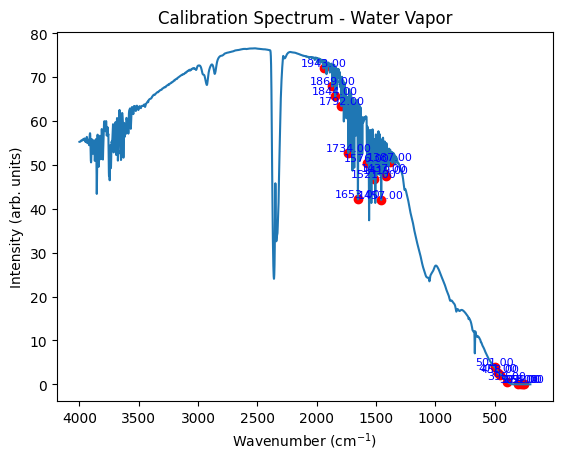

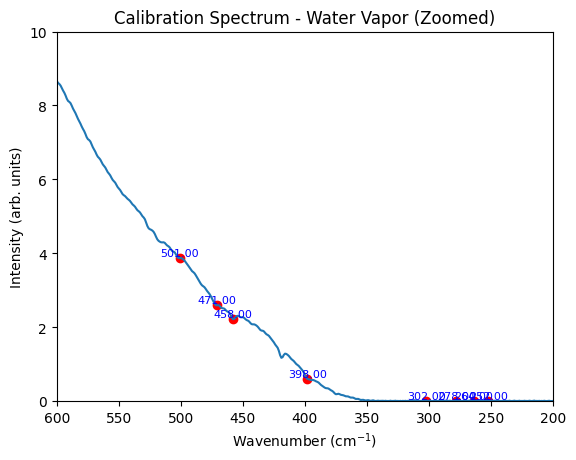

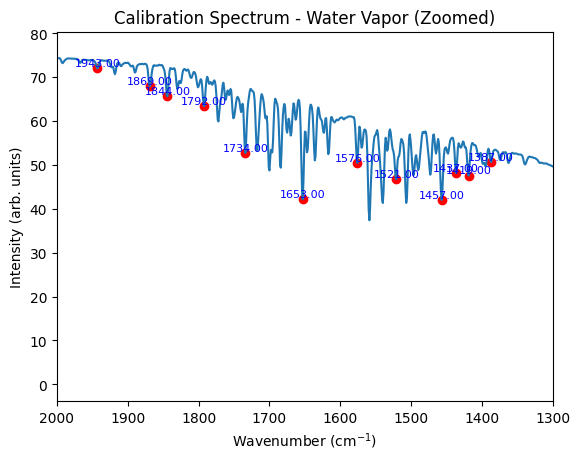

In [7]:
#quick plot to check the data importation
plt.plot(spectrum_dict['Water Vapor']['Wavenumber'], spectrum_dict['Water Vapor']['Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Water Vapor')
plt.scatter(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Intensity']):
            plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='blue')
plt.gca().invert_xaxis()
plt.show()

# Zoom in to the 0–600 wavenumber range
plt.plot(spectrum_dict['Water Vapor']['Wavenumber'], spectrum_dict['Water Vapor']['Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Water Vapor (Zoomed)')
plt.xlim(200, 600)
plt.ylim(0, 10)
plt.scatter(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Intensity']):
            if pd.notnull(x) and 200 <= x <= 600:  # Ensure x is within the desired range
                plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='blue')
plt.gca().invert_xaxis()  # If you want to keep the axis inverted
plt.show()

# Zoom in to the 1300–2000 wavenumber range
plt.plot(spectrum_dict['Water Vapor']['Wavenumber'], spectrum_dict['Water Vapor']['Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Water Vapor (Zoomed)')
plt.scatter(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Intensity']):
            if pd.notnull(x) and 1300 <= x <= 2000:  # Ensure x is within the desired range
                plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='blue')
plt.xlim(1300, 2000)
plt.gca().invert_xaxis()  # If you want to keep the axis inverted
plt.show()

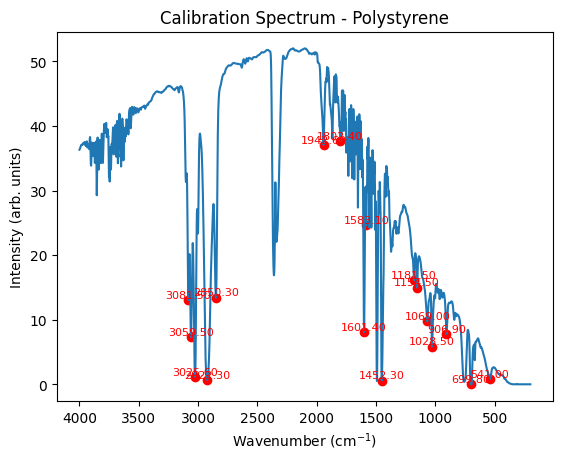

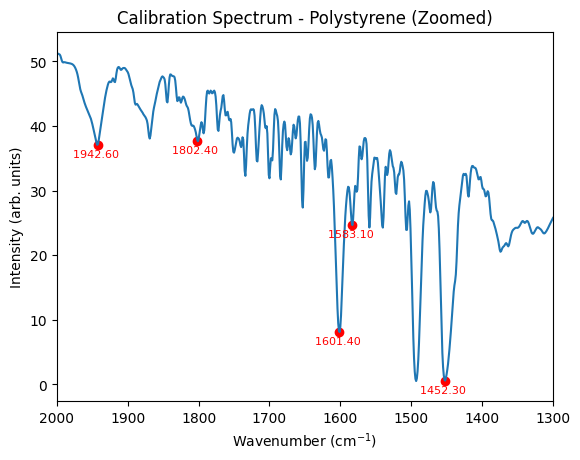

In [8]:
#quick plot to check the data importation
plt.plot(spectrum_dict['Polystyrene']['Wavenumber'], spectrum_dict['Polystyrene']['Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Polystyrene')
plt.scatter(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity']):
            plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='red')
plt.gca().invert_xaxis()
plt.show()

# Zoom in to the 0–600 wavenumber range
# plt.plot(spectrum_dict['Polystyrene']['Wavenumber'], spectrum_dict['Polystyrene']['Intensity'])
# plt.xlabel('Wavenumber (cm$^{-1}$)')
# plt.ylabel('Intensity (arb. units)')
# plt.title('Calibration Spectrum - Polystyrene (Zoomed)')
# plt.xlim(200, 600)
# plt.ylim(0, 10)
# plt.scatter(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity'], color='red', label='Troughs')
# for x, y in zip(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity']):
#             if pd.notnull(x) and 200 <= x <= 600:  # Ensure x is within the desired range
#                 plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='red')
# plt.gca().invert_xaxis()  # If you want to keep the axis inverted
# plt.show()

# Zoom in to the 1300–2000 wavenumber range
plt.plot(spectrum_dict['Polystyrene']['Wavenumber'], spectrum_dict['Polystyrene']['Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Polystyrene (Zoomed)')
plt.scatter(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity']):
            if pd.notnull(x) and 1300 <= x <= 2000:  # Ensure x is within the desired range
                plt.text(x, y-4, f"{x:.2f} \n", fontsize=8, ha='center', va='bottom', color='red')
plt.xlim(1300, 2000)
plt.gca().invert_xaxis()  # If you want to keep the axis inverted
plt.show()

Slope: 0.0006803299446164669, Intercept: -1.2187692704385258


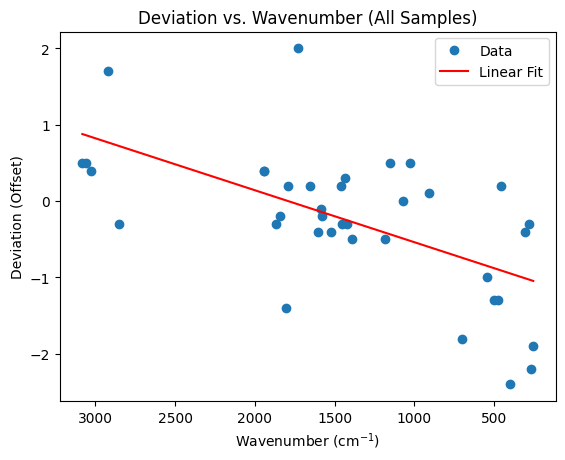

In [9]:
# Combine values from both keys
wavenumbers = trough_dict['Water Vapor']['Expected Trough'].tolist() + trough_dict['Polystyrene']['Expected Trough'].tolist()
deviations = trough_dict['Water Vapor']['Offset'].tolist() + trough_dict['Polystyrene']['Offset'].tolist()
def linear(x, m, b):
    return m * x + b

def fit_line(x, y):
    """Fit a linear line to the data."""
    m, b = np.polyfit(x, y, 1)
    return m, b

wavenumbers_np = np.array(wavenumbers)
deviations_np = np.array(deviations)

#Run the wavenumbers and deviations through the linear fit function
m, b = fit_line(wavenumbers_np, deviations_np)
print(f"Slope: {m}, Intercept: {b}")
# Sort for a clean line plot
sort_idx = np.argsort(wavenumbers_np)
wavenumbers_sorted = wavenumbers_np[sort_idx]
deviations_sorted = deviations_np[sort_idx]



# Plot combined data
plt.plot(wavenumbers_sorted, deviations_sorted, 'o', label='Data')
plt.plot(wavenumbers_sorted, linear(wavenumbers_sorted, m, b), color='red', label='Linear Fit')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Deviation (Offset)')
plt.title('Deviation vs. Wavenumber (All Samples)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

In [ ]:
spectrum_dict = utils.normalize(spectrum_dict)

Data for Water Vapor successfully normalized

Data for Polystyrene successfully normalized

Data for Glass successfully normalized

Data for NaCl successfully normalized

Data for Water Vapor with Plate successfully normalized

Data for Sapphire Transmittance successfully normalized

Data for Silicon Transmittance successfully normalized

Data for Zinc Oxide Front successfully normalized

Data for Gold Mirror Reflectivity successfully normalized

Data for Sapphire Reflectivity successfully normalized

Data for Silicone Reflectivity successfully normalized

Data for Zinc Oxide Reflectivity successfully normalized

Data for Gallium Arsenide Reflectivity successfully normalized



In [11]:
# print(spectrum_dict.keys())
# print(spectrum_dict)


In [12]:
for key in ['Glass', 'NaCl']:
    # Merge with Water Vapor on Wavenumber to align the data
    merged = pd.merge(
        spectrum_dict[key][['Wavenumber', 'Normalized Intensity']],
        spectrum_dict['Water Vapor'][['Wavenumber', 'Normalized Intensity']],
        on='Wavenumber',
        suffixes=('', '_WaterVapor')
    )
    # Create the ratio column
    spectrum_dict[key]['NormDivWaterVapor'] = merged['Normalized Intensity'] / merged['Normalized Intensity_WaterVapor']

In [13]:
# for key in ['Glass', 'NaCl']:
#     spectrum_dict[key]['Normalized Divided'] = spectrum_dict[key]['NormDivWaterVapor'] / np.max(spectrum_dict[key]['NormDivWaterVapor'])
    

In [14]:
# pd.set_option('display.max_rows', None)      # Show all rows
# print(spectrum_dict.keys())
# for key in spectrum_dict:
#     print(spectrum_dict[key].head())

In [15]:
spectrum_dict_sliced = {}

for key, data in spectrum_dict.items():
    if 'NormDivWaterVapor' not in data.columns:
        continue
    else:
        spectrum_dict_sliced[key] = utils.noise_cutoff_snr(data, window=25, noise_std_thresh=0.002)

        ### For Debug
        #print(spectrum_dict_sliced[key])

### For debug
#print(spectrum_dict_sliced.keys())

In [16]:
#print(spectrum_dict_sliced)

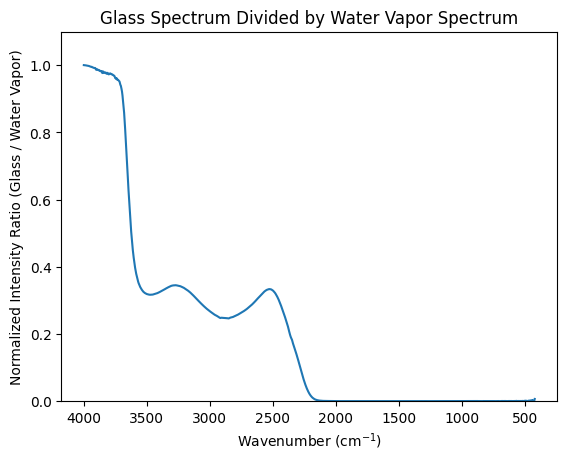

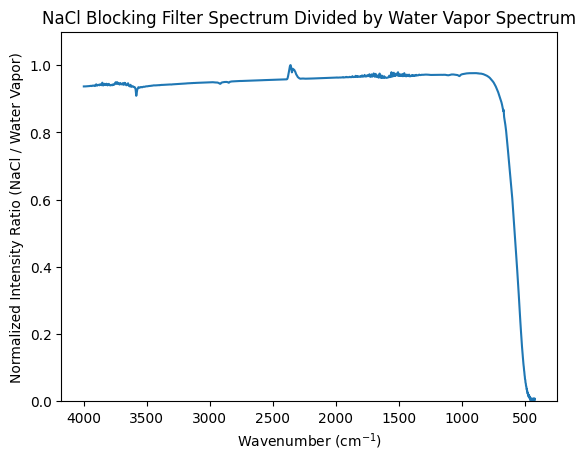

In [17]:
#Create a plot of the glass spectrum divided by the water vapor spectrum
plt.plot(spectrum_dict_sliced['Glass']['Wavenumber'], spectrum_dict_sliced['Glass']['NormDivWaterVapor']/spectrum_dict_sliced['Glass']['NormDivWaterVapor'].max())
plt.xlabel('Wavenumber (cm$^{-1}$)')
#plt.xlim(xmin=375)
plt.ylim(ymin=0, ymax=1.1)
plt.ylabel('Normalized Intensity Ratio (Glass / Water Vapor)')
plt.title('Glass Spectrum Divided by Water Vapor Spectrum')
plt.gca().invert_xaxis()
plt.show()

#Create a plot of the NaCl blocking filter spectrum divided by the water vapor spectrum
plt.plot(spectrum_dict_sliced['NaCl']['Wavenumber'], spectrum_dict_sliced['NaCl']['NormDivWaterVapor']/spectrum_dict_sliced['NaCl']['NormDivWaterVapor'].max())
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Normalized Intensity Ratio (NaCl / Water Vapor)')
plt.title('NaCl Blocking Filter Spectrum Divided by Water Vapor Spectrum')
plt.ylim(ymin=0, ymax=1.1)
plt.gca().invert_xaxis()
plt.show()

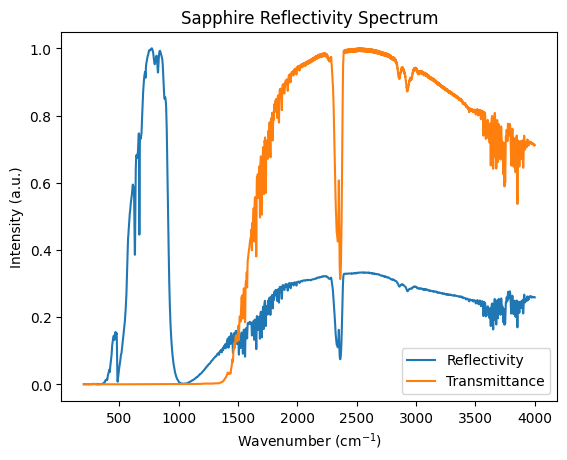

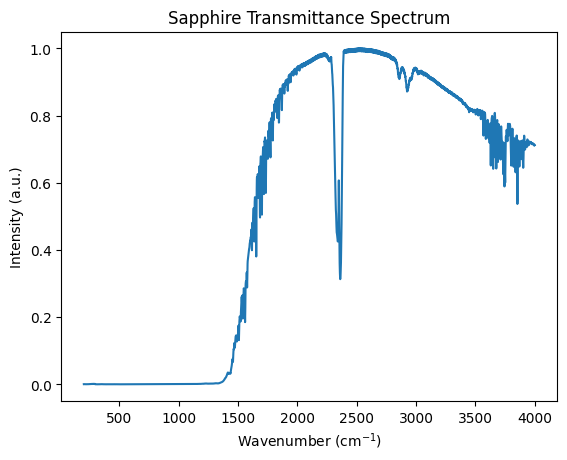

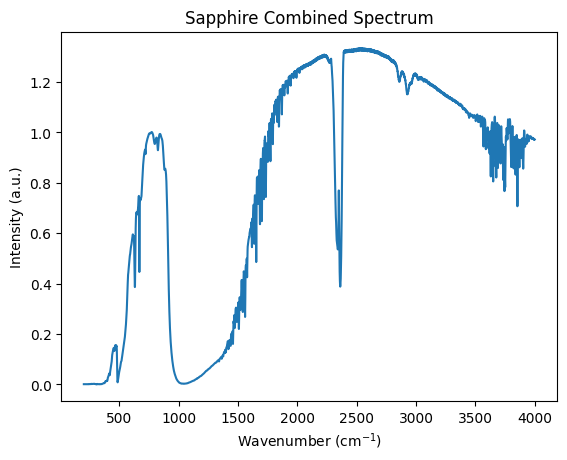

In [18]:
plt.plot(spectrum_dict['Sapphire Reflectivity']['Wavenumber'], spectrum_dict['Sapphire Reflectivity']['Normalized Intensity'], label='Reflectivity')
plt.plot(spectrum_dict['Sapphire Transmittance']['Wavenumber'], spectrum_dict['Sapphire Transmittance']['Normalized Intensity'], label='Transmittance')
plt.legend()
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.title('Sapphire Reflectivity Spectrum')
plt.show()

plt.plot(spectrum_dict['Sapphire Transmittance']['Wavenumber'], spectrum_dict['Sapphire Transmittance']['Normalized Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.title('Sapphire Transmittance Spectrum')
plt.show()

plt.plot(spectrum_dict['Sapphire Reflectivity']['Wavenumber'], spectrum_dict['Sapphire Reflectivity']['Normalized Intensity'] + spectrum_dict['Sapphire Transmittance']['Normalized Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.title('Sapphire Combined Spectrum')
plt.show()


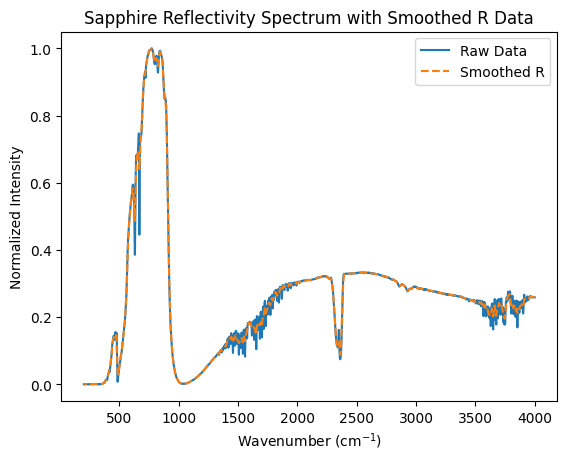

In [26]:
from scipy.ndimage import gaussian_filter1d
# Apply Gaussian smoothing
sigma = 2  # Standard deviation of the Gaussian kernel
smoothed_Y = gaussian_filter1d(spectrum_dict['Sapphire Reflectivity']['Normalized Intensity'], sigma=sigma)
for i in range(0, 5):
    smoothed_Y = gaussian_filter1d(smoothed_Y, sigma=sigma)


#Plot the sapphire reflectivity spectrum and the smoothed R data on the same plot
plt.plot(spectrum_dict['Sapphire Reflectivity']['Wavenumber'], spectrum_dict['Sapphire Reflectivity']['Normalized Intensity'], label='Raw Data')
plt.plot(spectrum_dict['Sapphire Reflectivity']['Wavenumber'], smoothed_Y, label='Smoothed R', linestyle='--')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Normalized Intensity')
plt.title('Sapphire Reflectivity Spectrum with Smoothed R Data')
plt.legend()
plt.show()



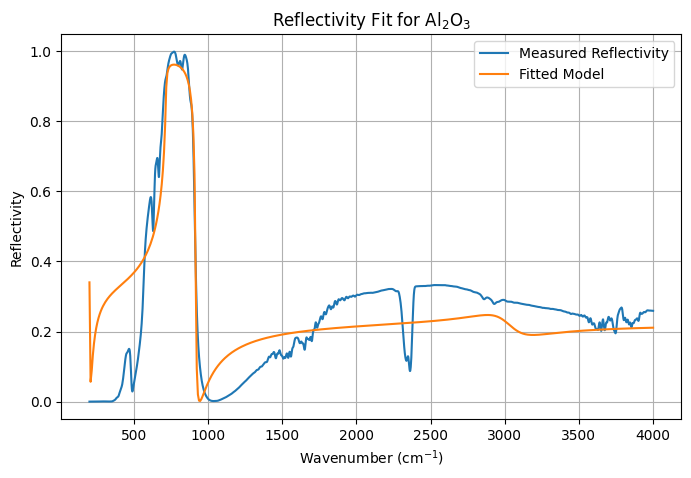

Fitted parameters:
z = 7.778
p = 10.000
q = 4.975
r = 0.251
a = 153.837
b = 9.379
c = 715.971
d = 8.001
e = 2999.998
f = 311.581


In [20]:
def reflectivity_complex_model(x, z, p, q, r, a, b, c, d, e, f):
    """
    Reflectivity model with three oscillators plus background.
    
    Parameters:
    - x : array-like, wavenumber values (cm⁻¹)
    - z, p, q, r : floats, model parameters (background + oscillator strengths)
    - a, b, c, d, e, f : floats, oscillator frequencies and damping constants
    
    Returns:
    - R : array-like, calculated reflectivity at each x
    """
    i = 1j
    term1 = p * a**2 / (a**2 - x**2 - i * x * b)
    term2 = q * c**2 / (c**2 - x**2 - i * x * d)
    term3 = r * e**2 / (e**2 - x**2 - i * x * f)
    
    sqrt_arg = z + term1 + term2 + term3
    sqrt_val = np.sqrt(sqrt_arg)
    
    numerator = 1 - sqrt_val
    denominator = 1 + sqrt_val
    
    R = np.abs(numerator / denominator)**2
    
    return R.real


w_data = spectrum_dict['Sapphire Reflectivity']['Wavenumber'].to_numpy()
R_data = smoothed_Y

# --- Initial parameter guesses ---
# You may need to tweak these based on your material/experiment
p0 = [
    3.0,   # z (background permittivity)
    5.0,   # p (oscillator strength 1)
    4.0,   # q (oscillator strength 2)
    2.0,   # r (oscillator strength 3)
    400,   # a (resonant freq 1)
    20,    # b (damping 1)
    900,   # c (resonant freq 2)
    30,    # d (damping 2)
    2000,  # e (resonant freq 3)
    25     # f (damping 3)
]
lower_bounds = [
    0.1,    # z (background permittivity, must be > 0)
    1e-6,   # p (oscillator strength 1)
    1e-6,   # q (oscillator strength 2)
    1e-6,   # r (oscillator strength 3)
    100,    # a (resonant frequency 1)
    1,      # b (damping 1)
    500,    # c (resonant frequency 2)
    1,      # d (damping 2)
    1000,   # e (resonant frequency 3)
    1       # f (damping 3)
]

upper_bounds = [
    10,     # z (background permittivity)
    10,     # p (oscillator strength 1)
    10,     # q (oscillator strength 2)
    10,     # r (oscillator strength 3)
    500,    # a (resonant frequency 1)
    100,    # b (damping 1)
    1200,   # c (resonant frequency 2)
    200,    # d (damping 2)
    3000,   # e (resonant frequency 3)
    500     # f (damping 3)
]

# --- Perform the fit ---
try:
    popt, pcov = curve_fit(
        reflectivity_complex_model,
        w_data,
        R_data,
        p0=p0,
        bounds = (lower_bounds, upper_bounds),
        maxfev=5000)
except RuntimeError as e:
    print("Fit did not converge:", e)
    popt = p0  # fallback to initial guesses if fit fails

# --- Plot data and fit ---
w_fit = np.linspace(w_data.min(), w_data.max(), 500)
R_fit = reflectivity_complex_model(w_fit, *popt)

plt.figure(figsize=(8,5))
plt.plot(w_data, R_data, label='Measured Reflectivity')
plt.plot(w_fit, R_fit, '-', label='Fitted Model')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Reflectivity')
plt.title('Reflectivity Fit for Al$_2$O$_3$')
plt.legend()
plt.grid(True)
plt.show()

# --- Print fitted parameters ---
param_names = ['z', 'p', 'q', 'r', 'a', 'b', 'c', 'd', 'e', 'f']
print("Fitted parameters:")
for name, val in zip(param_names, popt):
    print(f"{name} = {val:.3f}")


In [21]:
def oscillator_component(x, strength, resonance, damping):
    return (strength * resonance**2) / (resonance**2 - x**2 - 1j * x * damping)

def model_reflectivity_component(x, z, strength, resonance, damping):
    eps_total = z + oscillator_component(x, strength, resonance, damping)
    n = np.sqrt(eps_total)
    R = np.abs((n - 1) / (n + 1))**2
    return R


Fitted parameters:
eps_inf = 3.395
S1 = 3.256
w01 = 438.916
g1 = 0.766
S2 = 3.296
w02 = 568.162
g2 = 1.462
S3 = 0.341
w03 = 600.000
g3 = 100.000


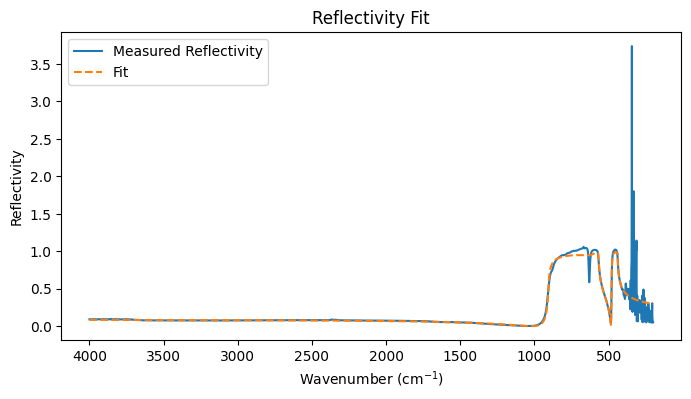

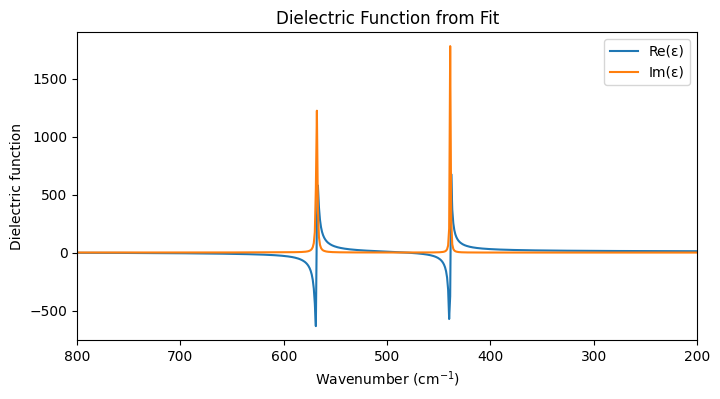

In [78]:
# Define dielectric function separately (Lorentz oscillators)
def dielectric_function(w, eps_inf, S1, w01, g1, S2, w02, g2, S3, w03, g3):
    i = 1j
    eps = eps_inf + \
          S1 * w01**2 / (w01**2 - w**2 - i * g1 * w) + \
          S2 * w02**2 / (w02**2 - w**2 - i * g2 * w) + \
          S3 * w03**2 / (w03**2 - w**2 - i * g3 * w)
    return eps

# Reflectivity model to fit (returns R)
def reflectivity_model(w, eps_inf, S1, w01, g1, S2, w02, g2, S3, w03, g3):
    eps = dielectric_function(w, eps_inf, S1, w01, g1, S2, w02, g2, S3, w03, g3)
    sqrt_eps = np.sqrt(eps)
    R = np.abs((1 - sqrt_eps) / (1 + sqrt_eps))**2
    return R.real  # real, since reflectivity is real-valued

# Initial parameter guesses
p0 = [
    3.0,        # eps_inf
    5.0, 400.0, 20.0,  # S1, w01, g1
    4.0, 630.0, 20.0,  # S2, w02, g2
    3.0, 900.0, 20.0   # S3, w03, g3
]

param_names = [
    'eps_inf',
    'S1', 'w01', 'g1',
    'S2', 'w02', 'g2',
    'S3', 'w03', 'g3'
]
lower_bounds = [
    1.0,     # eps_inf min
    0.0, 200.0, 0.0,   # S1, w01, g1 min
    0.0, 400.0, 0.0,   # S2, w02, g2 min
    0.0, 600.0, 0.0   # S3, w03, g3 min
]

upper_bounds = [
    10.0,    # eps_inf max
    10.0, 900.0, 100.0,   # S1, w01, g1 max
    10.0, 1200.0, 100.0,  # S2, w02, g2 max
    10.0, 1400.0, 100.0   # S3, w03, g3 max
]

wavenumber = np.array(spectrum_dict['Sapphire Reflectivity']['Wavenumber'])
R_normalized = np.array(spectrum_dict['Sapphire Reflectivity']['Intensity'] / spectrum_dict['Gold Mirror Reflectivity']['Intensity'])

# Optional: restrict fitting range to where phonon modes appear, e.g. 400-1300 cm^-1
fit_mask = (wavenumber > 400) & (wavenumber < 1300)
w_fit = wavenumber[fit_mask]
R_fit = R_normalized[fit_mask]

popt, pcov = curve_fit(
    reflectivity_model,
    w_fit,
    R_fit,
    p0=p0,
    bounds=(lower_bounds, upper_bounds),
    maxfev=5000
)

print("Fitted parameters:")
for name, val in zip(param_names, popt):
    print(f"{name} = {val:.3f}")

# Calculate dielectric function using fitted params
eps_fit = dielectric_function(wavenumber, *popt)

# Plot reflectivity fit
plt.figure(figsize=(8,4))
plt.plot(wavenumber, R_normalized, label='Measured Reflectivity')
plt.plot(wavenumber, reflectivity_model(wavenumber, *popt), '--', label='Fit')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Reflectivity')
plt.gca().invert_xaxis()
plt.legend()
plt.title('Reflectivity Fit')
plt.show()

# Plot dielectric function
plt.figure(figsize=(8,4))
plt.plot(wavenumber, eps_fit.real, label='Re(ε)')
plt.plot(wavenumber, eps_fit.imag, label='Im(ε)')
plt.xlim(200, 800)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Dielectric function')
plt.gca().invert_xaxis()
plt.legend()
plt.title('Dielectric Function from Fit')
plt.show()


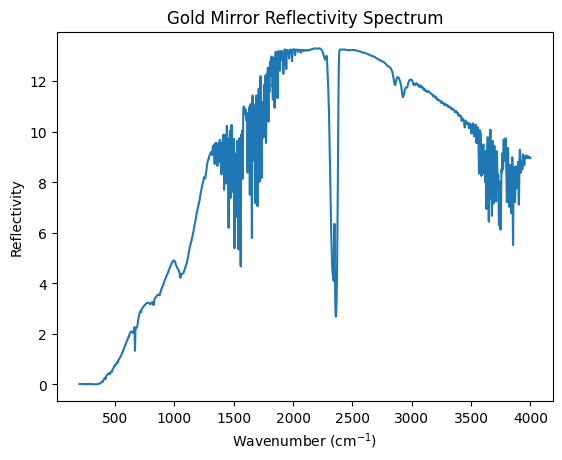

In [76]:
plt.plot(spectrum_dict['Gold Mirror Reflectivity']['Wavenumber'], spectrum_dict['Gold Mirror Reflectivity']['Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Reflectivity')
plt.title('Gold Mirror Reflectivity Spectrum')
plt.show()

<Axes: title={'center': 'Normalized Sapphire Reflectivity / Gold Glass Baseline'}, xlabel='Wavenumber (cm$^{-1}$)', ylabel='Reflectivity'>

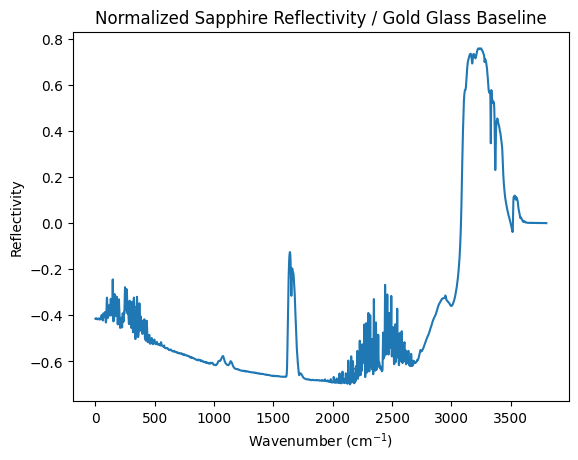

In [35]:
### Create normalized data for sapphire reflectiivity / gold glass baseline
spectrum_dict['Sapphire Reflectivity']['NormDivGold'] = spectrum_dict['Sapphire Reflectivity']['Normalized Intensity'] - spectrum_dict['Gold Mirror Reflectivity']['Normalized Intensity']
spectrum_dict['Sapphire Reflectivity']['NormDivGold'].plot(title='Normalized Sapphire Reflectivity / Gold Glass Baseline', xlabel='Wavenumber (cm$^{-1}$)', ylabel='Reflectivity')

<Axes: title={'center': 'Sapphire Reflectivity'}, xlabel='Wavenumber (cm$^{-1}$)', ylabel='Reflectivity'>

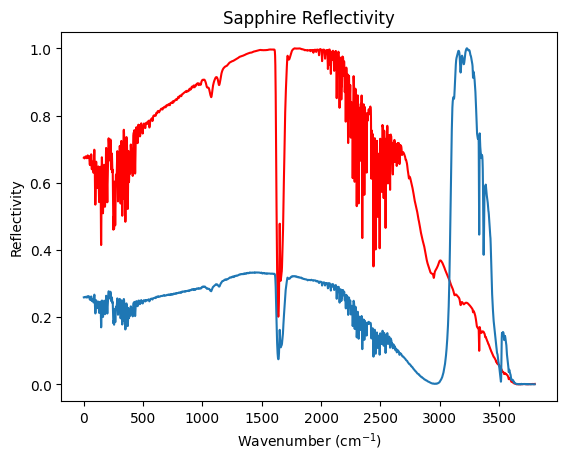

In [34]:
spectrum_dict['Gold Mirror Reflectivity']['Normalized Intensity'].plot(title='Gold Mirror Reflectivity', xlabel='Wavenumber (cm$^{-1}$)', ylabel='Reflectivity', color='Red')
spectrum_dict['Sapphire Reflectivity']['Normalized Intensity'].plot(title='Sapphire Reflectivity', xlabel='Wavenumber (cm$^{-1}$)', ylabel='Reflectivity')




In [68]:
#load the transmissivity data for polystyrene calibration
styrene_twavenumber, styrene_tintensity = utils.load_data(r'Data/Transmittance/polystyrene.ASC')

#quick plot to check the data importation
plt.plot(styrene_twavenumber, styrene_tintensity)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Polystyrene')
plt.gca().invert_xaxis()
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

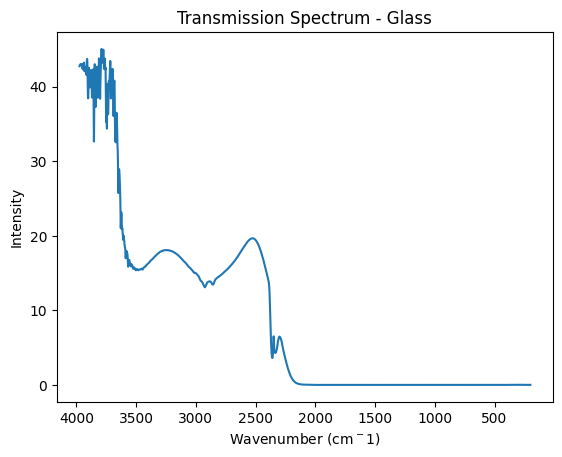

In [ ]:
#load the transmissivity data for glass
glass_twavenumber, glass_tintensity = utils.load_data(r'Data/Transmittance/glass.ASC')

#quick plot to check the data importation
plt.plot(glass_twavenumber, glass_tintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Transmission Spectrum - Glass')
plt.gca().invert_xaxis()
plt.show()

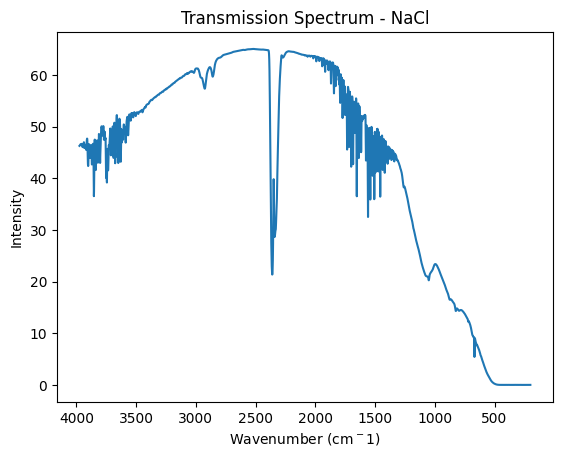

In [ ]:
#load the transmissivity data for NaCl
nacl_twavenumber, nacl_tintensity = utils.load_data(r'Data/Transmittance/NaCl blocking filter.ASC')

#quick plot to check data importation
plt.plot(nacl_twavenumber, nacl_tintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Transmission Spectrum - NaCl')
plt.gca().invert_xaxis()
plt.show()

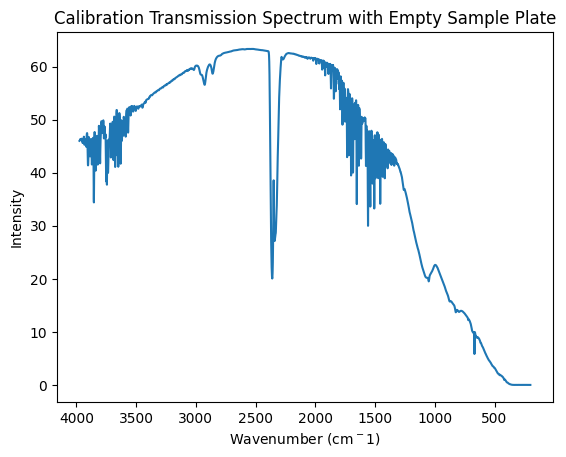

In [ ]:
#load the transmissivity for water vapor with the empty sample plate in place
vapor_plate_wavenumber, vapor_plate_intensity = utils.load_data(r'Data/Transmittance/water vapor with plate.ASC')

#plot the data right quick
plt.plot(vapor_plate_wavenumber, vapor_plate_intensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Calibration Transmission Spectrum with Empty Sample Plate')
plt.gca().invert_xaxis()

plt.show()

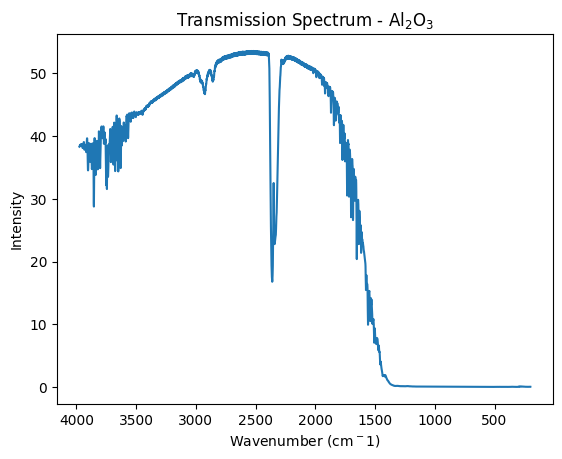

In [ ]:
#Load the transmissivity data for sapphire
sapphire_twavenumber, sapphire_tintensity = utils.load_data(r'Data/Transmittance/AlO2 transmittance.ASC')

#quick plot to check the data
plt.plot(sapphire_twavenumber, sapphire_tintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Transmission Spectrum - Al$_2$O$_3$')
plt.gca().invert_xaxis()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

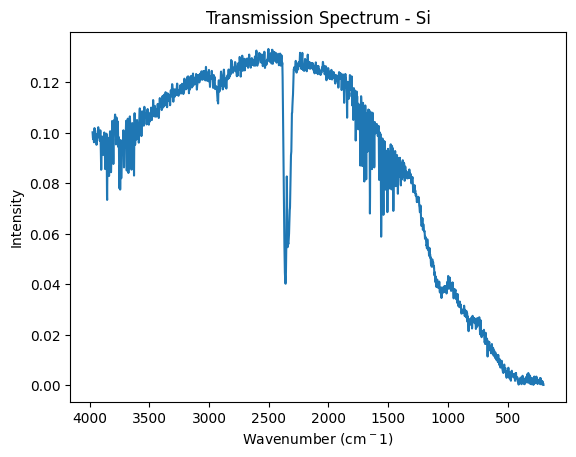

In [ ]:
#load the transmissivity data for Si
si_twavenumber, si_tintensity = utils.load_data(r'Data/Transmittance/Si transmission try 2.ASC')

#quick plot to check the data
plt.plot(si_twavenumber, si_tintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Transmission Spectrum - Si')
plt.gca().invert_xaxis()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

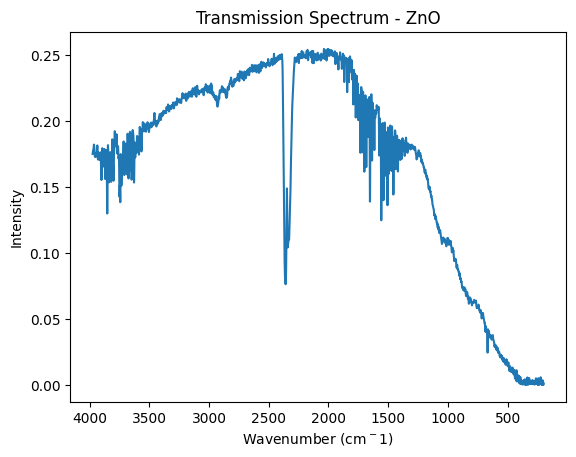

In [ ]:
#load the transmissivity data for ZnO
zno_twavenumber, zno_tintensity = utils.load_data(r'Data/Transmittance/ZnO front try 1.ASC')

#quick plot to check the data
plt.plot(zno_twavenumber, zno_tintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Transmission Spectrum - ZnO')
plt.gca().invert_xaxis()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

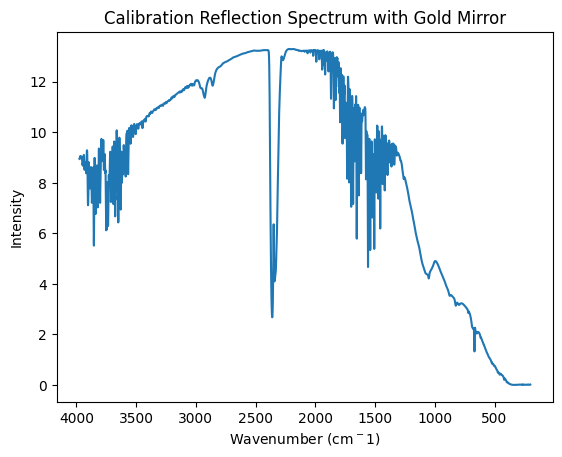

In [ ]:
#Load the baseline reflectivity data
calib_rwavenumber, calib_rintensity = utils.load_data(r'Data/Reflectivity/Gold Mirror baseline reflectivity.ASC')

#plot the data to check
plt.plot(calib_rwavenumber, calib_rintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Calibration Reflection Spectrum with Gold Mirror')
plt.gca().invert_xaxis()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

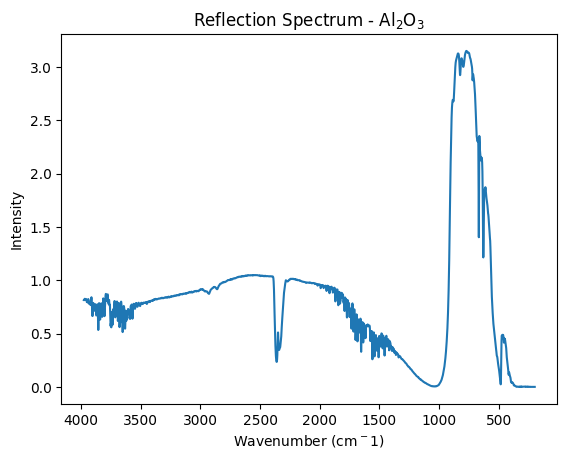

In [ ]:
#Load the reflectivity data for sapphire
sapphire_rwavenumber, sapphire_rintensity = utils.load_data(r'Data/Reflectivity/AlO2 Reflectivity full range.ASC')

#plot the data to check
plt.plot(sapphire_rwavenumber, sapphire_rintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Reflection Spectrum - Al$_2$O$_3$')
plt.gca().invert_xaxis()

plt.show

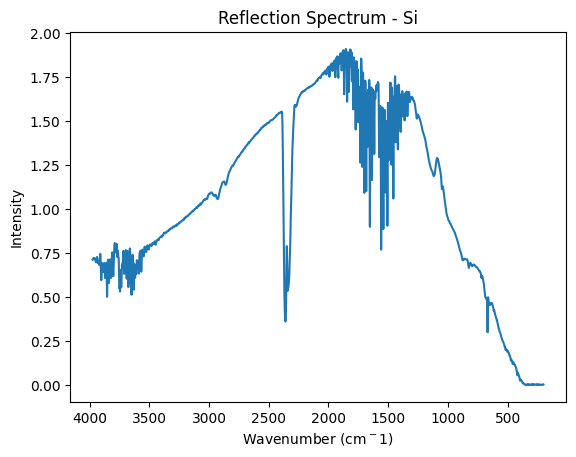

In [ ]:
#Load the reflectivity data for Si
si_rwavenumber, si_rintensity = utils.load_data(r'Data/Reflectivity/Silicone reflectivity spectrum.ASC')

#plot the data to check
plt.plot(si_rwavenumber, si_rintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Reflection Spectrum - Si')
plt.gca().invert_xaxis()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

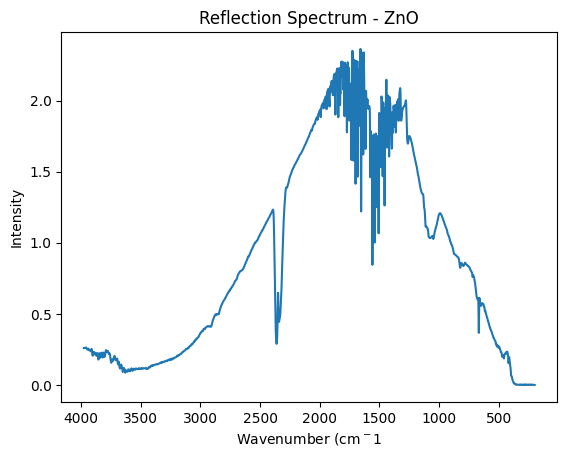

In [ ]:
#Load the reflectivity data for ZnO
zno_rwavenumber, zno_rintensity = utils.load_data(r'Data/Reflectivity/ZnO thin film reflectivity.ASC')

#plot the data to check
plt.plot(zno_rwavenumber, zno_rintensity)
plt.xlabel('Wavenumber (cm$^-1$')
plt.ylabel('Intensity')
plt.title('Reflection Spectrum - ZnO')
plt.gca().invert_xaxis()

plt.show

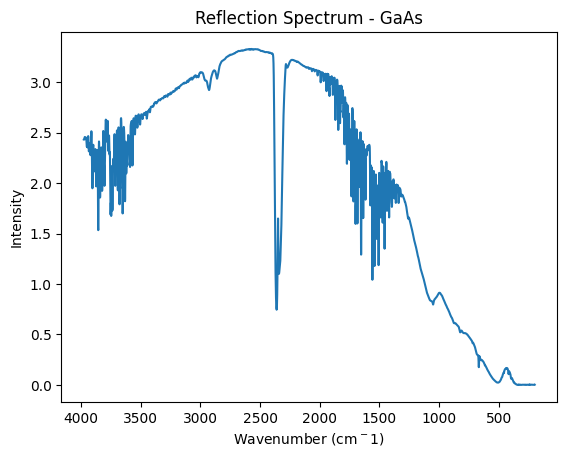

In [ ]:
#Load the reflectivity data for GaAs
gaas_rwavenumber, gaas_rintensity = utils.load_data(r'Data/Reflectivity/GaAs reflectivity spectrum.ASC')

#plot to check data
plt.plot(gaas_rwavenumber, gaas_rintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Reflection Spectrum - GaAs')
plt.gca().invert_xaxis()

plt.show()

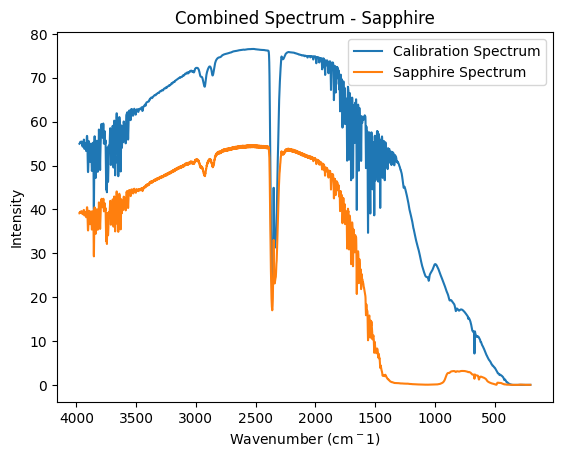

In [ ]:
#Combine reflectivity and transmissivity of sapphire and plot
sapphire_comb_intensity = sapphire_tintensity + sapphire_rintensity
vapor_comb_intensity = vapor_plate_intensity + calib_rintensity

#plot the new data
plt.plot(sapphire_twavenumber, vapor_comb_intensity, label = 'Calibration Spectrum')
plt.plot(sapphire_twavenumber, sapphire_comb_intensity, label = 'Sapphire Spectrum')
plt.legend()
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Combined Spectrum - Sapphire')
plt.gca().invert_xaxis()

plt.legend()

plt.show()

In [39]:
si_absorbance = -np.log10(spectrum_dict['Silicon Transmittance']['Normalized Intensity'])

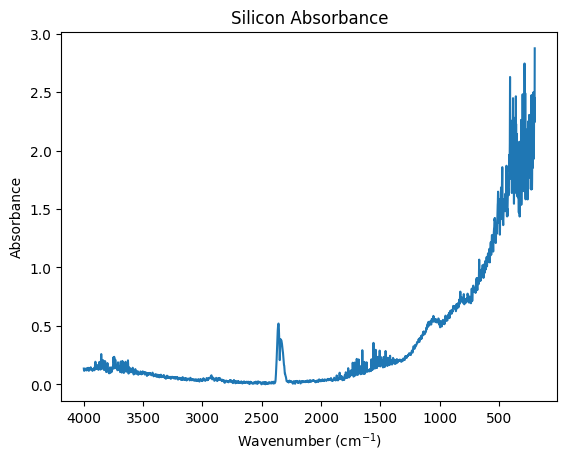

In [40]:
x_data = spectrum_dict['Silicon Transmittance']['Wavenumber']
y_data = si_absorbance
plt.plot(x_data, y_data)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Absorbance')
plt.title('Silicon Absorbance')
plt.gca().invert_xaxis()
plt.show()

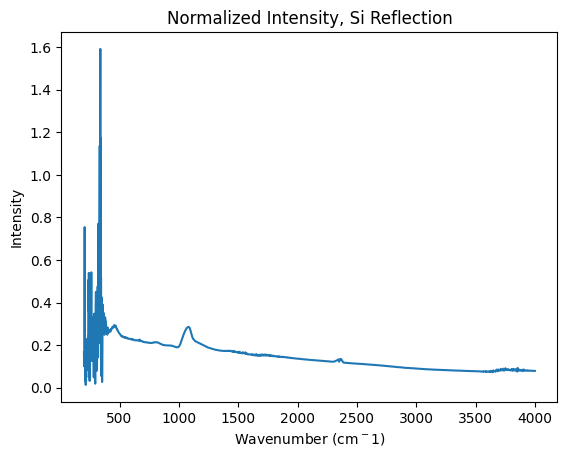

In [72]:
spectrum_dict['Silicone Reflectivity']['Normalized Intensity'] = spectrum_dict['Silicone Reflectivity']['Intensity'] / spectrum_dict['Gold Mirror Reflectivity']['Intensity']
spectrum_dict['Silicon Transmittance']['Normalized Intensity'] = spectrum_dict['Silicon Transmittance']['Intensity'] / spectrum_dict['Gold Mirror Reflectivity']['Intensity']
x_data_si_r = spectrum_dict['Silicone Reflectivity']['Wavenumber']
y_data_si_r = spectrum_dict['Silicone Reflectivity']['Normalized Intensity']
plt.plot(x_data_si_r, y_data_si_r)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Normalized Intensity, Si Reflection')
plt.show()


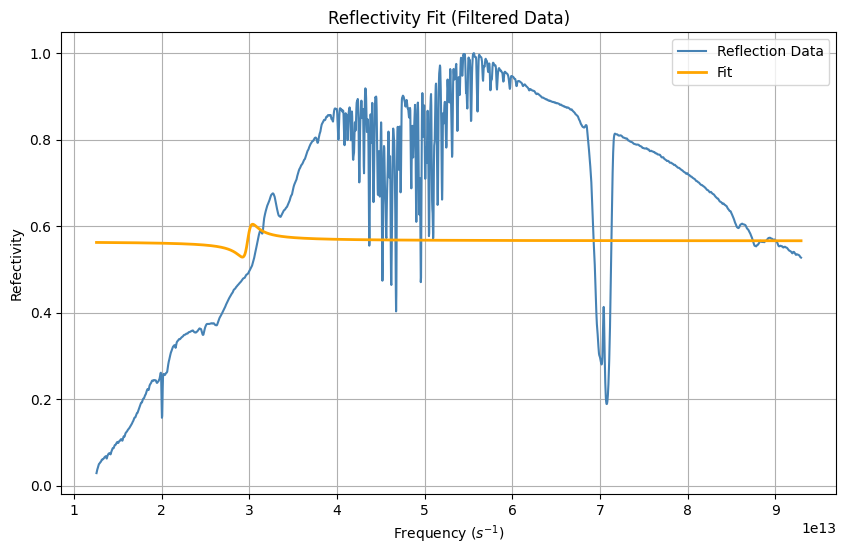

Fitted parameters:
epsilon_inf = 49.99999999999999± 1.5232023048269447
omega_LO = 10000000000218.215± 29510687039.08352
omega_TO = 29999999998456.496± 511122507963.6289
gamma = 1144704932933.9548± 1012634571875.9319


In [52]:
def R_model(omega,epsilon_inf,omega_LO, omega_TO, gamma):
    
    kai_l=(omega_LO**2-omega_TO**2)/(omega_TO**2-(omega)**2-1j*(omega)*gamma)
 
    n=(epsilon_inf+kai_l)**0.5
    
    reflectivity=np.abs((1-n)/(1+n))**2
    
    return reflectivity

initial_guesses = [1.1,1.2e13, 1.29e13, 2.00e13]
x_data = spectrum_dict['Silicone Reflectivity']['Wavenumber'] * 2.9979e10
y_data = spectrum_dict['Silicone Reflectivity']['Normalized Intensity']
try:
    popt, pcov = curve_fit(R_model,x_data[900:3582], y_data[900:3582], p0=initial_guesses,
                           bounds=([0.1, 1e13, 1e13, 1e11], [50, 3e13, 3e13, 1e14]))

    epsilon_inf,omega_LO, omega_TO, gamma = popt
    uncertainties = np.sqrt(np.diag(pcov)) 

    x_fit = np.linspace(min(x_data[900:3582]), max(x_data[900:3582]), 2500)
    y_fit = R_model(x_fit, *popt)

    plt.figure(figsize=(10, 6))
    plt.plot(x_data[900:3582], y_data[900:3582], label='Reflection Data', markersize=4,color='steelblue')
    plt.plot(x_fit, y_fit, '-', label=f'Fit', linewidth=2,color='orange')
    plt.xlabel("Frequency $(s^{-1})$")
    plt.ylabel("Refectivity")
    plt.legend()
    plt.grid(True)
    plt.title("Reflectivity Fit (Filtered Data)")
    plt.show()

    print("Fitted parameters:")
    print(f"epsilon_inf = {epsilon_inf}± {uncertainties[0]}")
    print(f"omega_LO = {omega_LO}± {uncertainties[1]}")
    print(f"omega_TO = {omega_TO}± {uncertainties[2]}")
    print(f"gamma = {gamma}± {uncertainties[3]}")
except Exception as e:
    print(f"An error occurred: {e}")



In [81]:
import numpy as np
from scipy.interpolate import interp1d

# Get the DataFrames
si_df = spectrum_dict['Silicone Reflectivity']
gold_df = spectrum_dict['Gold Mirror Reflectivity']

# Extract columns (assuming the first column is wavenumber, second is intensity)
si_wavenumbers = si_df.iloc[:, 0].values
si_intensity = si_df.iloc[:, 1].values

gold_wavenumbers = gold_df.iloc[:, 0].values
gold_intensity = gold_df.iloc[:, 1].values

# Interpolate gold reflectivity to match Si wavenumbers
gold_interp = interp1d(gold_wavenumbers, gold_intensity, kind='linear', fill_value="extrapolate")

# Normalize
normalized_si_reflectivity = si_intensity / gold_interp(si_wavenumbers)


In [82]:
import pandas as pd

normalized_df = pd.DataFrame({
    'Wavenumber (cm⁻¹)': si_wavenumbers,
    'Normalized Reflectivity': normalized_si_reflectivity
})


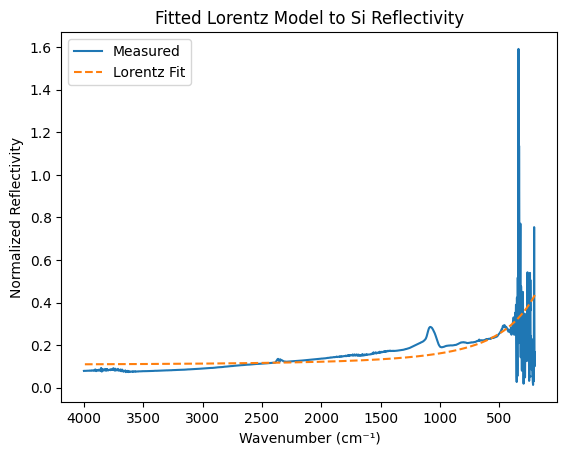

In [88]:
from scipy.optimize import curve_fit

# Sample Lorentz model reflectivity at normal incidence
def lorentz_reflectivity(w, A, w0, gamma, eps_inf):
    omega = 2 * np.pi * w * 100  # Convert to rad/s (1/cm to 1/m)
    
    # Complex permittivity
    eps_complex = eps_inf + (A * w0**2) / (w0**2 - omega**2 - 1j * gamma * omega)
    
    # Refractive index n + ik
    n_complex = np.sqrt(eps_complex)

    # Reflectivity at normal incidence (magnitude squared of Fresnel reflection coefficient)
    r = (n_complex - 1) / (n_complex + 1)
    R = np.abs(r)**2
    
    return R.real  # Return real-valued array for curve_fit


#from scipy.optimize import curve_fit

p0 = [1e4, 1000, 100, 11]  # Initial guess: [A, w0, gamma, eps_inf]
popt, _ = curve_fit(lorentz_reflectivity, si_wavenumbers, normalized_si_reflectivity, p0=p0)

# Now you can plot your fit:
import matplotlib.pyplot as plt

fit_vals = lorentz_reflectivity(si_wavenumbers, *popt)

plt.plot(si_wavenumbers, normalized_si_reflectivity, label='Measured')
plt.plot(si_wavenumbers, fit_vals, label='Lorentz Fit', linestyle='--')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Normalized Reflectivity')
plt.legend()
plt.title('Fitted Lorentz Model to Si Reflectivity')
plt.gca().invert_xaxis()  # Optional: IR spectra usually have decreasing x
plt.show()


In [87]:
print(si_wavenumbers[:10])  # Check if wavenumbers increase or decrease


[200. 201. 202. 203. 204. 205. 206. 207. 208. 209.]


In [86]:
# Flip only if needed
if si_wavenumbers[0] > si_wavenumbers[-1]:
    si_wavenumbers = si_wavenumbers[::-1]
    normalized_si_reflectivity = normalized_si_reflectivity[::-1]


In [ ]:
def multi_lorentz_reflectivity(w, A1, w01, g1, A2, w02, g2, eps_inf):
    omega = 2 * np.pi * w * 100
    eps = eps_inf \
        + (A1 * w01**2) / (w01**2 - omega**2 - 1j * g1 * omega) \
        + (A2 * w02**2) / (w02**2 - omega**2 - 1j * g2 * omega)
    n_complex = np.sqrt(eps)
    r = (n_complex - 1) / (n_complex + 1)
    return np.abs(r)**2

p0 = [1e4, 1000, 100, 5e3, 400, 50, 11]



In [91]:
print(spectrum_dict['Silicone Reflectivity'].head(50))

    Wavenumber  Intensity  Normalized Intensity
0       4000.0   0.708462              0.078966
1       3999.0   0.709386              0.079089
2       3998.0   0.709825              0.079203
3       3997.0   0.709483              0.079250
4       3996.0   0.708362              0.079189
5       3995.0   0.706801              0.079034
6       3994.0   0.705277              0.078852
7       3993.0   0.704200              0.078713
8       3992.0   0.703897              0.078650
9       3991.0   0.704581              0.078657
10      3990.0   0.706170              0.078706
11      3989.0   0.708186              0.078771
12      3988.0   0.709932              0.078831
13      3987.0   0.710910              0.078871
14      3986.0   0.711127              0.078895
15      3985.0   0.711019              0.078920
16      3984.0   0.711075              0.078963
17      3983.0   0.711541              0.079019
18      3982.0   0.712379              0.079076
19      3981.0   0.713341              0

In [93]:
df = spectrum_dict['Silicone Reflectivity']

# Flip if needed (descending → ascending)
if df['Wavenumber'].iloc[0] > df['Wavenumber'].iloc[-1]:
    df = df[::-1].reset_index(drop=True)

wavenumbers = df['Wavenumber'].values
norm_reflectivity = df['Normalized Intensity'].values

c_cm_per_s = 2.99792458e10  # cm/s
frequencies = wavenumbers * c_cm_per_s  # in Hz

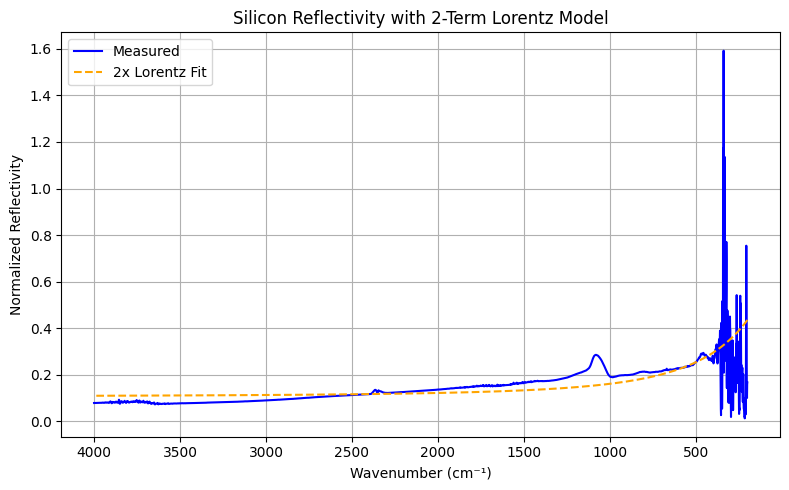

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Step 1: Extract and flip data if needed
df = spectrum_dict['Silicone Reflectivity']

if df['Wavenumber'].iloc[0] > df['Wavenumber'].iloc[-1]:
    df = df[::-1].reset_index(drop=True)

wavenumbers = df['Wavenumber'].values
reflectivity = df['Normalized Intensity'].values

# Optional: Convert to frequency (Hz), but not necessary unless required
# c = 2.99792458e10  # speed of light in cm/s
# frequencies = wavenumbers * c

# Step 2: Define Multi-Lorentz Reflectivity Model
def multi_lorentz_reflectivity(w, A1, w01, g1, A2, w02, g2, eps_inf):
    omega = 2 * np.pi * w * 100  # Convert cm⁻¹ to rad/s
    eps = eps_inf \
        + (A1 * w01**2) / (w01**2 - omega**2 - 1j * g1 * omega) \
        + (A2 * w02**2) / (w02**2 - omega**2 - 1j * g2 * omega)
    n_complex = np.sqrt(eps)
    r = (n_complex - 1) / (n_complex + 1)
    R = np.abs(r)**2
    return R.real  # Real-valued reflectivity

# Step 3: Initial guess (important!)
p0 = [
    5e4, 1000, 100,   # First oscillator: A1, w01, g1
    1e4, 400, 30,     # Second oscillator: A2, w02, g2
    11                # epsilon-infinity
]

# Step 4: Fit model to data
popt, _ = curve_fit(multi_lorentz_reflectivity, wavenumbers, reflectivity, p0=p0, maxfev=10000)

# Step 5: Generate fitted curve
fit_vals = multi_lorentz_reflectivity(wavenumbers, *popt)

# Step 6: Plotting
plt.figure(figsize=(8, 5))
plt.plot(wavenumbers, reflectivity, label='Measured', color='blue')
plt.plot(wavenumbers, fit_vals, '--', label='2x Lorentz Fit', color='orange')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Normalized Reflectivity')
plt.title('Silicon Reflectivity with 2-Term Lorentz Model')
plt.legend()
plt.gca().invert_xaxis()  # Optional, traditional IR plot style
plt.grid(True)
plt.tight_layout()
plt.show()


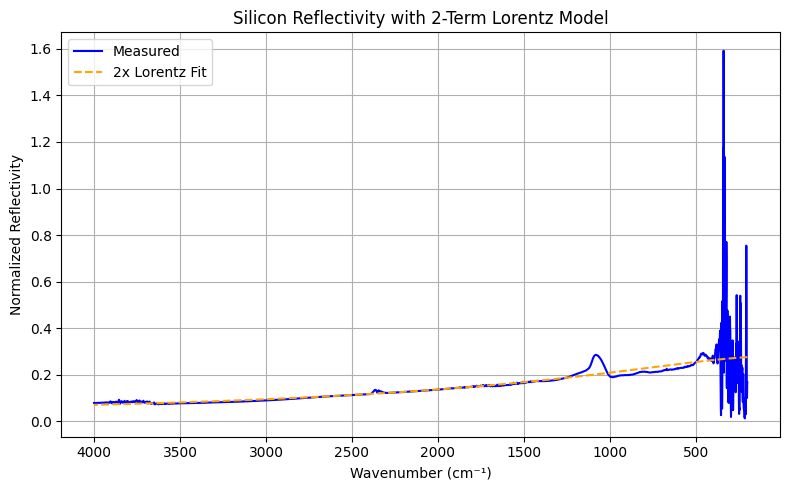

In [96]:
def lorentz_3term(w, A1, w01, g1, A2, w02, g2, A3, w03, g3, eps_inf):
    omega = 2 * np.pi * w * 100
    eps = eps_inf \
        + (A1 * w01**2) / (w01**2 - omega**2 - 1j * g1 * omega) \
        + (A2 * w02**2) / (w02**2 - omega**2 - 1j * g2 * omega) \
        + (A3 * w03**2) / (w03**2 - omega**2 - 1j * g3 * omega)
    n_complex = np.sqrt(eps)
    r = (n_complex - 1) / (n_complex + 1)
    return np.abs(r)**2

p0 = [
    5e4, 1000, 100,   # A1, w01, g1
    1e4, 600, 30,     # A2, w02, g2
    8e3, 400, 20,     # A3, w03, g3
    11               # eps_inf
]

from scipy.optimize import curve_fit
popt, _ = curve_fit(lorentz_3term, wavenumbers, reflectivity, p0=p0, maxfev=20000)
fit_vals = lorentz_3term(wavenumbers, *popt)

from scipy.ndimage import uniform_filter1d
reflectivity_smoothed = uniform_filter1d(reflectivity, size=5)

plt.figure(figsize=(8, 5))
plt.plot(wavenumbers, reflectivity, label='Measured', color='blue')
plt.plot(wavenumbers, fit_vals, '--', label='2x Lorentz Fit', color='orange')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Normalized Reflectivity')
plt.title('Silicon Reflectivity with 2-Term Lorentz Model')
plt.legend()
plt.gca().invert_xaxis()  # Optional, traditional IR plot style
plt.grid(True)
plt.tight_layout()
plt.show()

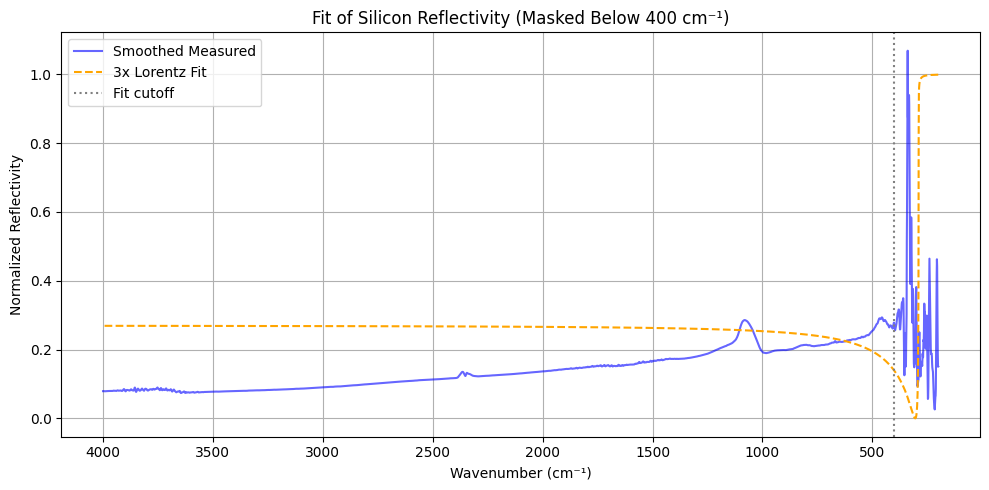


Fitted Parameters:
      A1: 6.783e+04
     w01: 1.993e+03
      g1: 1.500e+02
      A2: 4.507e+04
     w02: 6.988e+02
      g2: 1.500e+02
      A3: 3.293e+04
     w03: 1.079e+03
      g3: 1.500e+02
 eps_inf: 1.000e+01


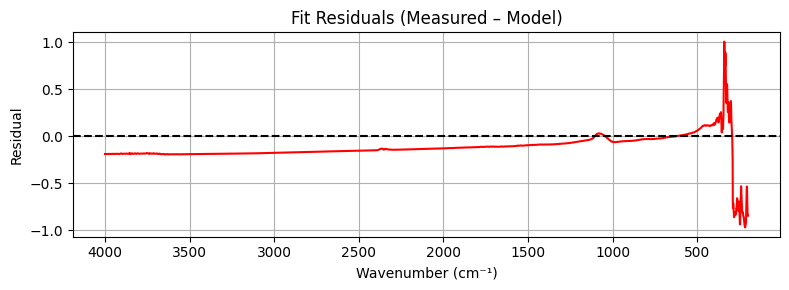

In [105]:
# --- DATA PREP ---
df = spectrum_dict['Silicone Reflectivity']

# Flip if necessary
if df['Wavenumber'].iloc[0] > df['Wavenumber'].iloc[-1]:
    df = df[::-1].reset_index(drop=True)

# Apply a new cutoff (try 400 cm⁻¹)
cutoff = 400
mask = df['Wavenumber'] >= cutoff
wavenumbers_masked = df['Wavenumber'].values[mask]
reflectivity_masked = df['Normalized Intensity'].values[mask]

# Optional smoothing for display
reflectivity_smoothed = uniform_filter1d(df['Normalized Intensity'].values, size=5)

# --- 3-Term Lorentz Model ---
def lorentz_3term(w, A1, w01, g1, A2, w02, g2, A3, w03, g3, eps_inf):
    omega = 2 * np.pi * w * 100
    eps = eps_inf \
        + (A1 * w01**2) / (w01**2 - omega**2 - 1j * g1 * omega) \
        + (A2 * w02**2) / (w02**2 - omega**2 - 1j * g2 * omega) \
        + (A3 * w03**2) / (w03**2 - omega**2 - 1j * g3 * omega)
    n_complex = np.sqrt(eps)
    r = (n_complex - 1) / (n_complex + 1)
    return np.abs(r)**2

# --- Initial Guess & Bounds ---
p0 = [
    3e4, 1100, 80,   # A1, w01, g1 (main phonon)
    2e4, 700,  60,   # A2, w02, g2
    1e4, 400,  40,   # A3, w03, g3
    11              # eps_inf
]

lower_bounds = [
    0,   100,   1,
    0,   100,   1,
    0,   100,   1,
    10
]

upper_bounds = [
    1e6, 5000, 150,
    1e6, 5000, 150,
    1e6, 5000, 150,
    15
]

# For tighter range on one resonance:
lower_bounds[4] = 600
upper_bounds[4] = 700


# --- Fit ---
popt, _ = curve_fit(
    lorentz_3term,
    wavenumbers_masked,
    reflectivity_masked,
    p0=p0,
    bounds=(lower_bounds, upper_bounds),
    maxfev=20000
)

# --- Fit Evaluation & Plotting ---
fit_full = lorentz_3term(df['Wavenumber'].values, *popt)

plt.figure(figsize=(10, 5))
plt.plot(df['Wavenumber'], reflectivity_smoothed, label='Smoothed Measured', color='blue', alpha=0.6)
plt.plot(df['Wavenumber'], fit_full, '--', label='3x Lorentz Fit', color='orange')
plt.axvline(x=cutoff, linestyle=':', color='gray', label='Fit cutoff')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Normalized Reflectivity')
plt.title('Fit of Silicon Reflectivity (Masked Below 400 cm⁻¹)')
plt.gca().invert_xaxis()
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Optional: Print Parameters ---
param_labels = ["A1", "w01", "g1", "A2", "w02", "g2", "A3", "w03", "g3", "eps_inf"]
print("\nFitted Parameters:")
for label, val in zip(param_labels, popt):
    print(f"{label:>8}: {val:.3e}")


residuals = reflectivity_smoothed - fit_full
plt.figure(figsize=(8, 3))
plt.plot(df['Wavenumber'], residuals, color='red')
plt.axhline(0, linestyle='--', color='black')
plt.gca().invert_xaxis()
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Residual')
plt.title('Fit Residuals (Measured – Model)')
plt.tight_layout()
plt.grid(True)
plt.show()


In [100]:
param_labels = [
    "A1", "w01", "g1",
    "A2", "w02", "g2",
    "A3", "w03", "g3",
    "eps_inf"
]

for label, val in zip(param_labels, popt):
    print(f"{label:>8}: {val:.3e}")


      A1: 7.728e-08
     w01: 3.000e+02
      g1: 5.022e+01
      A2: 2.312e-08
     w02: 3.000e+02
      g2: 2.556e+02
      A3: 1.903e-08
     w03: 3.000e+02
      g3: 2.000e+01
 eps_inf: 4.717e+00


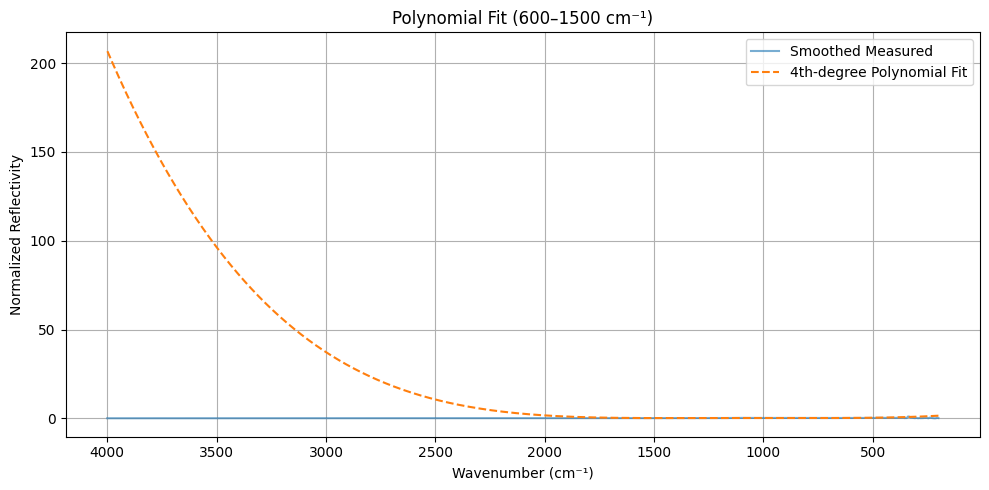

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Use the masked, smoothed data for stability
w = df['Wavenumber'].values
y = reflectivity_smoothed

# Only fit in mid-range region
fit_mask = (w >= 600) & (w <= 1500)
w_fit = w[fit_mask]
y_fit = y[fit_mask]

# Fit polynomial (e.g. 4th-degree)
pfit = Polynomial.fit(w_fit, y_fit, deg=4)
y_poly = pfit(w)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(w, y, label='Smoothed Measured', alpha=0.6)
plt.plot(w, y_poly, '--', label='4th-degree Polynomial Fit')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Normalized Reflectivity')
plt.title('Polynomial Fit (600–1500 cm⁻¹)')
plt.gca().invert_xaxis()
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


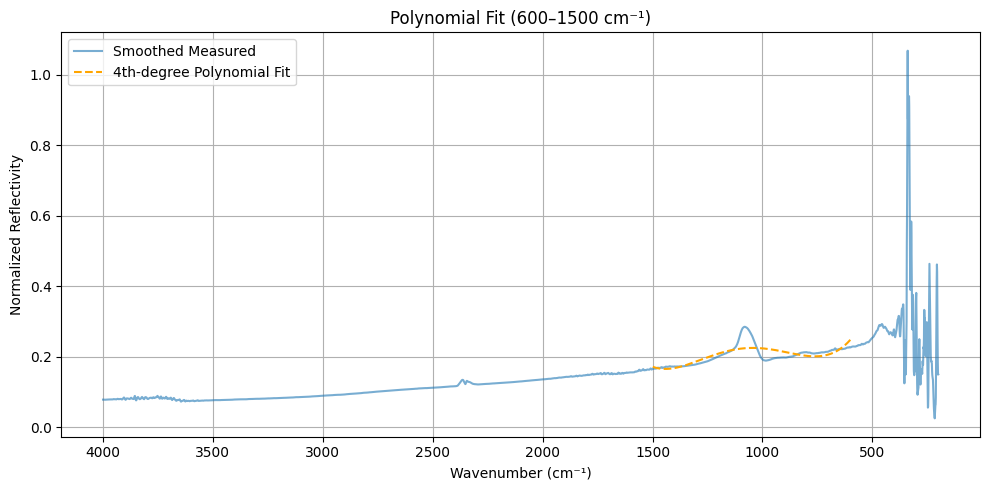

In [107]:
# Only apply the polynomial to its fitting domain
w_display = np.linspace(600, 1500, 500)
y_poly = pfit(w_display)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(w, y, label='Smoothed Measured', alpha=0.6)
plt.plot(w_display, y_poly, '--', label='4th-degree Polynomial Fit', color='orange')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Normalized Reflectivity')
plt.title('Polynomial Fit (600–1500 cm⁻¹)')
plt.gca().invert_xaxis()
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


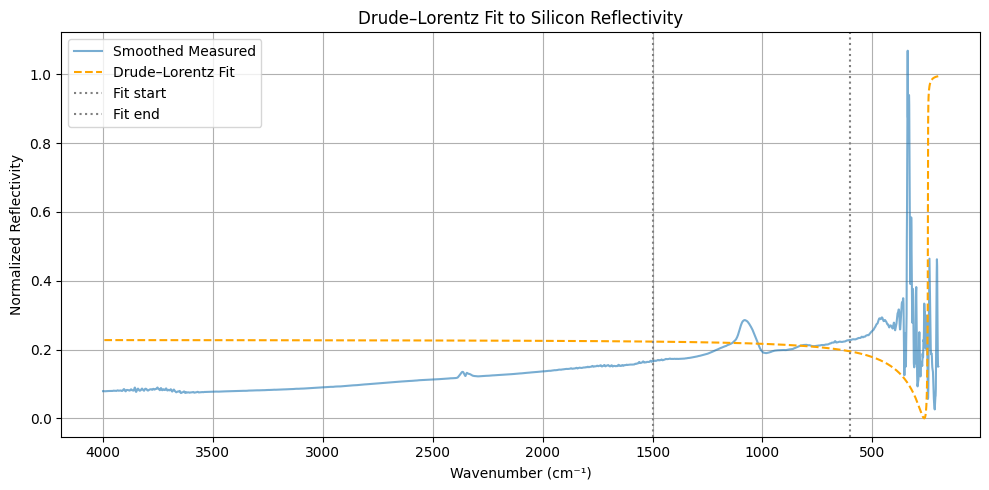


Fitted Parameters:
        wp: 1.031e+05
   gamma_d: 5.000e+02
        A1: 1.594e+05
       w01: 1.067e+03
        g1: 3.000e+02
   eps_inf: 8.000e+00


In [108]:
# --- Drude–Lorentz model ---
def drude_lorentz(w, wp, gamma_d, A1, w01, g1, eps_inf):
    omega = 2 * np.pi * w * 100  # Convert cm⁻¹ to rad/s

    eps_drude = - (wp**2) / (omega**2 + 1j * gamma_d * omega)
    eps_lorentz = (A1 * w01**2) / (w01**2 - omega**2 - 1j * g1 * omega)
    eps = eps_inf + eps_drude + eps_lorentz

    n_complex = np.sqrt(eps)
    r = (n_complex - 1) / (n_complex + 1)
    return np.abs(r)**2

# Fit mask (focus on good region)
fit_mask = (df['Wavenumber'] >= 600) & (df['Wavenumber'] <= 1500)
wavenumbers_fit = df['Wavenumber'].values[fit_mask]
reflectivity_fit = reflectivity_smoothed[fit_mask]

# Initial guess: wp, gamma_d, A1, w01, g1, eps_inf
p0 = [5e4, 100, 3e4, 1000, 80, 11]

# Bounds
lower = [0,   1,   0,   600,  10, 8]
upper = [1e6, 500, 1e6, 1500, 300, 20]

# Fit
popt, _ = curve_fit(drude_lorentz, wavenumbers_fit, reflectivity_fit, p0=p0, bounds=(lower, upper), maxfev=20000)

# Evaluate over full range
w_full = df['Wavenumber'].values
fit_drude_lorentz = drude_lorentz(w_full, *popt)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(w_full, reflectivity_smoothed, label='Smoothed Measured', alpha=0.6)
plt.plot(w_full, fit_drude_lorentz, '--', label='Drude–Lorentz Fit', color='orange')
plt.axvline(x=600, linestyle=':', color='gray', label='Fit start')
plt.axvline(x=1500, linestyle=':', color='gray', label='Fit end')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Normalized Reflectivity')
plt.title('Drude–Lorentz Fit to Silicon Reflectivity')
plt.gca().invert_xaxis()
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Output parameters
param_labels = ['wp', 'gamma_d', 'A1', 'w01', 'g1', 'eps_inf']
print("\nFitted Parameters:")
for label, val in zip(param_labels, popt):
    print(f"{label:>10}: {val:.3e}")


Grid Search Progress: 100%|██████████| 972/972 [00:08<00:00, 117.77it/s]


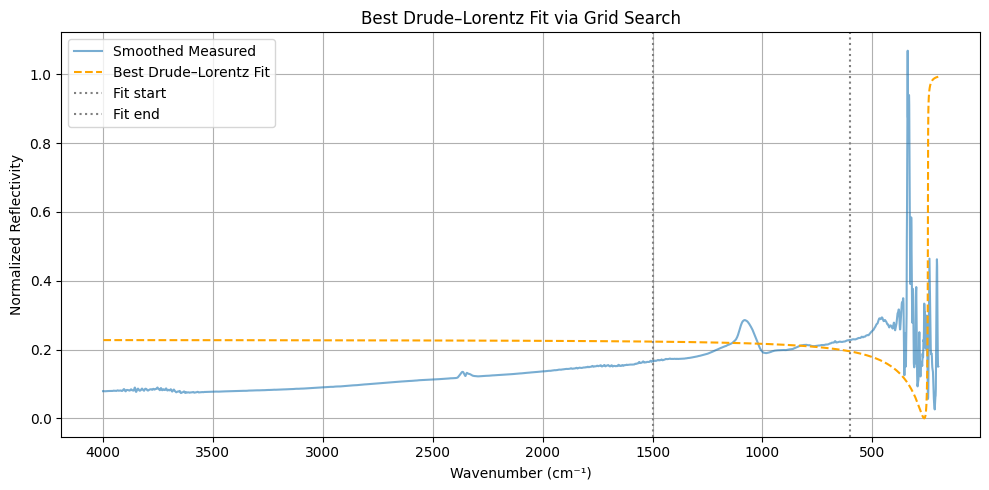


Best Fit Parameters:
        wp: 2.992e+05
   gamma_d: 5.000e+02
        A1: 1.204e+05
       w01: 9.233e+02
        g1: 3.000e+02
   eps_inf: 8.000e+00
Best MSE: 1.0517e-03


In [109]:
from itertools import product
from tqdm import tqdm

# --- Define Drude–Lorentz model ---
def drude_lorentz(w, wp, gamma_d, A1, w01, g1, eps_inf):
    omega = 2 * np.pi * w * 100  # Convert cm⁻¹ to rad/s
    eps_drude = - (wp**2) / (omega**2 + 1j * gamma_d * omega)
    eps_lorentz = (A1 * w01**2) / (w01**2 - omega**2 - 1j * g1 * omega)
    eps = eps_inf + eps_drude + eps_lorentz
    n_complex = np.sqrt(eps)
    r = (n_complex - 1) / (n_complex + 1)
    return np.abs(r)**2

# --- Fit range ---
fit_mask = (df['Wavenumber'] >= 600) & (df['Wavenumber'] <= 1500)
wavenumbers_fit = df['Wavenumber'].values[fit_mask]
reflectivity_fit = reflectivity_smoothed[fit_mask]

# --- Grid search parameter values ---
wp_vals      = [2e4, 5e4, 1e5]
gamma_d_vals = [50, 100, 200]
A1_vals      = [2e4, 5e4, 1e5]
w01_vals     = [950, 1000, 1050, 1100]
g1_vals      = [50, 100, 200]
eps_inf_vals = [10, 11, 12]

param_grid = list(product(wp_vals, gamma_d_vals, A1_vals, w01_vals, g1_vals, eps_inf_vals))

# --- Track best result ---
best_mse = np.inf
best_popt = None

# --- Grid search loop with progress bar ---
for wp, gamma_d, A1, w01, g1, eps_inf in tqdm(param_grid, desc="Grid Search Progress"):
    p0 = [wp, gamma_d, A1, w01, g1, eps_inf]
    try:
        popt, _ = curve_fit(
            drude_lorentz,
            wavenumbers_fit,
            reflectivity_fit,
            p0=p0,
            bounds=([0, 1, 0, 600, 10, 8], [1e6, 500, 1e6, 1500, 300, 20]),
            maxfev=10000
        )
        y_pred = drude_lorentz(wavenumbers_fit, *popt)
        mse = np.mean((reflectivity_fit - y_pred) ** 2)

        if mse < best_mse:
            best_mse = mse
            best_popt = popt
    except Exception:
        continue

# --- Evaluate and plot best fit ---
w_full = df['Wavenumber'].values
fit_full = drude_lorentz(w_full, *best_popt)

plt.figure(figsize=(10, 5))
plt.plot(w_full, reflectivity_smoothed, label='Smoothed Measured', alpha=0.6)
plt.plot(w_full, fit_full, '--', label='Best Drude–Lorentz Fit', color='orange')
plt.axvline(x=600, linestyle=':', color='gray', label='Fit start')
plt.axvline(x=1500, linestyle=':', color='gray', label='Fit end')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Normalized Reflectivity')
plt.title('Best Drude–Lorentz Fit via Grid Search')
plt.gca().invert_xaxis()
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Print best-fit parameters ---
param_labels = ['wp', 'gamma_d', 'A1', 'w01', 'g1', 'eps_inf']
print("\nBest Fit Parameters:")
for label, val in zip(param_labels, best_popt):
    print(f"{label:>10}: {val:.3e}")
print(f"Best MSE: {best_mse:.4e}")


## Zinc Oxide stuff (Task 5)

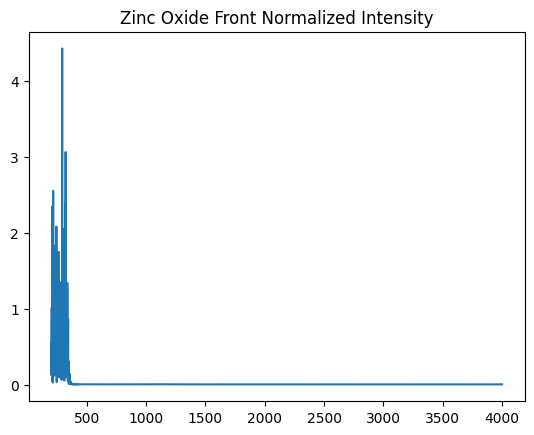

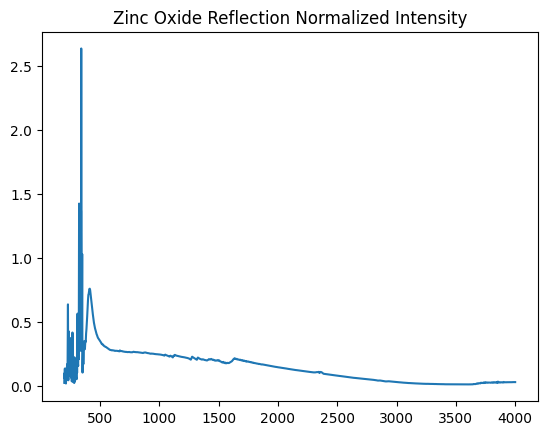

In [112]:
spectrum_dict['Zinc Oxide Front']['Normalized Intensity'] = spectrum_dict['Zinc Oxide Front']['Intensity'] / spectrum_dict['Water Vapor']['Intensity']
spectrum_dict['Zinc Oxide Reflectivity']['Normalized Intensity'] = spectrum_dict['Zinc Oxide Reflectivity']['Intensity'] / spectrum_dict['Gold Mirror Reflectivity']['Intensity'] 

plt.plot(spectrum_dict['Zinc Oxide Front']['Wavenumber'], spectrum_dict['Zinc Oxide Front']['Normalized Intensity'])
plt.title('Zinc Oxide Front Normalized Intensity')
plt.show()

plt.plot(spectrum_dict['Zinc Oxide Reflectivity']['Wavenumber'], spectrum_dict['Zinc Oxide Reflectivity']['Normalized Intensity'])
plt.title('Zinc Oxide Reflection Normalized Intensity')
plt.show()

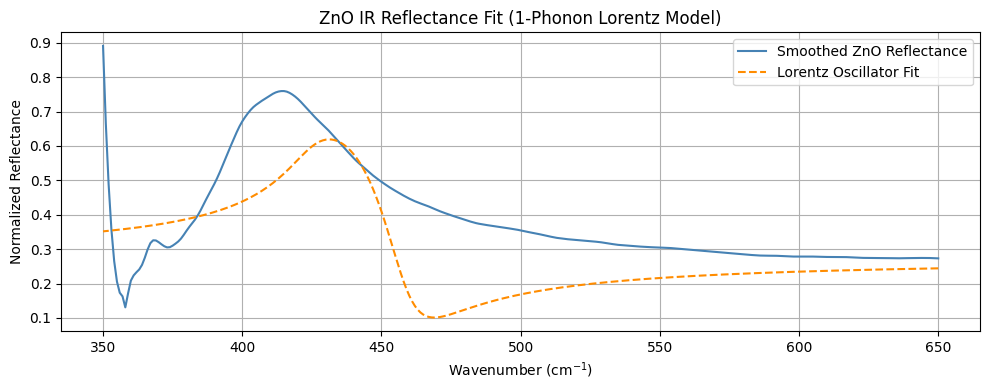

ε_inf  = 10.000
ω_LO   = 700.0 cm⁻¹
ω_TO   = 424.3 cm⁻¹
γ      = 20.4 cm⁻¹


In [113]:
# Replace these with your actual arrays:
wavenumber = np.array(spectrum_dict['Zinc Oxide Reflectivity']['Wavenumber'])  # in cm⁻¹
reflectance = np.array(spectrum_dict['Zinc Oxide Reflectivity']['Normalized Intensity'])

# --- Masking the phonon region (adjust as needed) ---
mask = (wavenumber >= 350) & (wavenumber <= 650)
w_masked = wavenumber[mask]
R_masked = reflectance[mask]

# --- Smoothing to suppress spikes ---
R_smooth = savgol_filter(R_masked, window_length=15, polyorder=3)

# --- Lorentz oscillator dielectric model ---
def lorentz_eps(omega, eps_inf, w_lo, w_to, gamma):
    num = w_lo**2 - w_to**2
    denom = w_to**2 - omega**2 - 1j * gamma * omega
    return eps_inf + num / denom

def reflectivity_model(omega, eps_inf, w_lo, w_to, gamma):
    eps = lorentz_eps(omega, eps_inf, w_lo, w_to, gamma)
    n = np.sqrt((np.abs(eps) + eps.real) / 2)
    k = np.sqrt((np.abs(eps) - eps.real) / 2)
    R = ((n - 1)**2 + k**2) / ((n + 1)**2 + k**2)
    return R

# --- Convert wavenumber to angular frequency (rad/s) ---
c_cm = 3e10  # speed of light in cm/s
omega_masked = 2 * np.pi * c_cm * w_masked

# --- Initial parameter guess and bounds ---
p0 = [3.5, 590 * 2 * np.pi * c_cm, 430 * 2 * np.pi * c_cm, 50 * 2 * np.pi * c_cm]
bounds = ([1, 500 * 2 * np.pi * c_cm, 350 * 2 * np.pi * c_cm, 1e10],
          [10, 700 * 2 * np.pi * c_cm, 500 * 2 * np.pi * c_cm, 1e14])

# --- Fitting wrapper ---
def fit_wrapper(omega, eps_inf, w_lo, w_to, gamma):
    return reflectivity_model(omega, eps_inf, w_lo, w_to, gamma)

# --- Fit the model ---
popt, _ = curve_fit(fit_wrapper, omega_masked, R_smooth, p0=p0, bounds=bounds)
eps_inf, w_lo, w_to, gamma = popt

# --- Plot the fit ---
omega_fit = 2 * np.pi * c_cm * w_masked
R_fit = fit_wrapper(omega_fit, *popt)

plt.figure(figsize=(10, 4))
plt.plot(w_masked, R_smooth, label='Smoothed ZnO Reflectance', color='steelblue')
plt.plot(w_masked, R_fit, '--', label='Lorentz Oscillator Fit', color='darkorange')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Normalized Reflectance')
plt.title('ZnO IR Reflectance Fit (1-Phonon Lorentz Model)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Display fitted values ---
print(f"ε_inf  = {eps_inf:.3f}")
print(f"ω_LO   = {w_lo / (2 * np.pi * c_cm):.1f} cm⁻¹")
print(f"ω_TO   = {w_to / (2 * np.pi * c_cm):.1f} cm⁻¹")
print(f"γ      = {gamma / (2 * np.pi * c_cm):.1f} cm⁻¹")

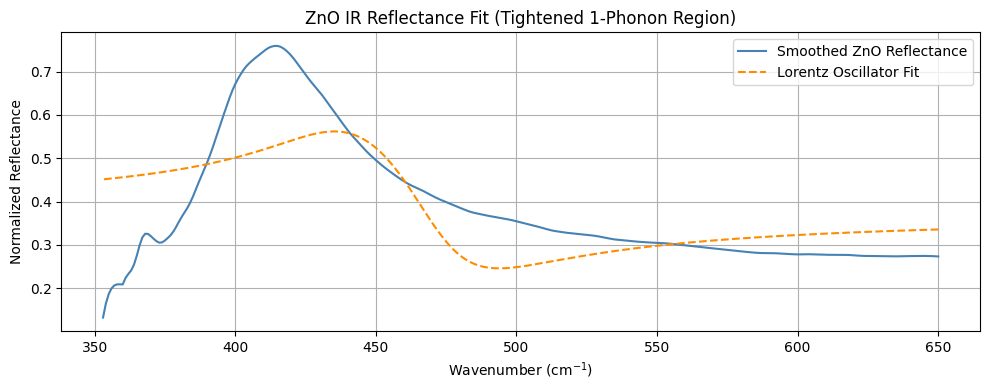

ε_inf  = 16.706
ω_LO   = 900.0 cm⁻¹
ω_TO   = 434.6 cm⁻¹
γ      = 45.8 cm⁻¹


In [128]:
# --- Updated mask: tighter around the phonon dip ---
mask = (wavenumber >= 353) & (wavenumber <= 650)
w_masked = wavenumber[mask]
R_masked = reflectance[mask]
R_smooth = savgol_filter(R_masked, window_length=15, polyorder=3)

# --- Update ω for fit ---
omega_masked = 2 * np.pi * c_cm * w_masked

# --- Fit ---
popt, _ = curve_fit(fit_wrapper, omega_masked, R_smooth, p0=p0, bounds=bounds)
eps_inf, w_lo, w_to, gamma = popt

# --- Replot ---
omega_fit = 2 * np.pi * c_cm * w_masked
R_fit = fit_wrapper(omega_fit, *popt)

plt.figure(figsize=(10, 4))
plt.plot(w_masked, R_smooth, label='Smoothed ZnO Reflectance', color='steelblue')
plt.plot(w_masked, R_fit, '--', label='Lorentz Oscillator Fit', color='darkorange')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Normalized Reflectance')
plt.title('ZnO IR Reflectance Fit (Tightened 1-Phonon Region)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"ε_inf  = {eps_inf:.3f}")
print(f"ω_LO   = {w_lo / (2 * np.pi * c_cm):.1f} cm⁻¹")
print(f"ω_TO   = {w_to / (2 * np.pi * c_cm):.1f} cm⁻¹")
print(f"γ      = {gamma / (2 * np.pi * c_cm):.1f} cm⁻¹")


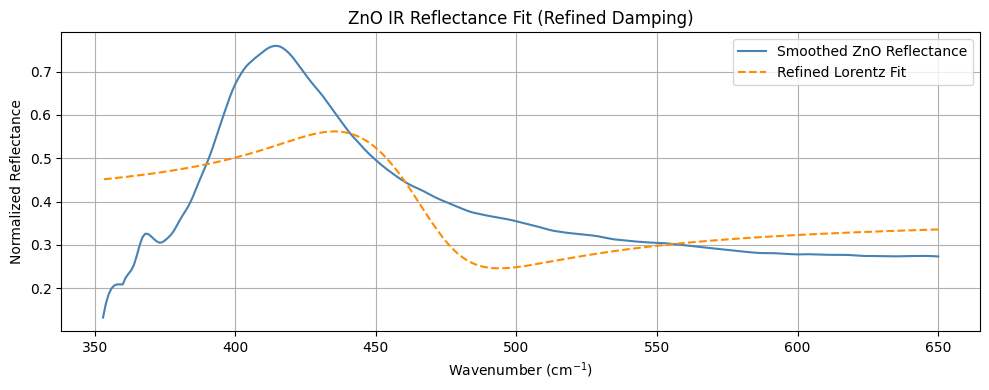

ε_inf  = 16.706
ω_LO   = 900.0 cm⁻¹
ω_TO   = 434.6 cm⁻¹
γ      = 45.8 cm⁻¹


In [131]:
# Updated initial guess and wider bounds to allow for more damping
p0 = [10, 700 * 2 * np.pi * c_cm, 420 * 2 * np.pi * c_cm, 100 * 2 * np.pi * c_cm]  # ε_inf, LO, TO, gamma
bounds = (
    [1, 400 * 2 * np.pi * c_cm, 350 * 2 * np.pi * c_cm, 10 * 2 * np.pi * c_cm],    # Lower bounds
    [30, 900 * 2 * np.pi * c_cm, 500 * 2 * np.pi * c_cm, 300 * 2 * np.pi * c_cm]   # Upper bounds
)

# --- Fit ---
popt, _ = curve_fit(fit_wrapper, omega_masked, R_smooth, p0=p0, bounds=bounds)
eps_inf, w_lo, w_to, gamma = popt

# --- Replot ---
omega_fit = 2 * np.pi * c_cm * w_masked
R_fit = fit_wrapper(omega_fit, *popt)

plt.figure(figsize=(10, 4))
plt.plot(w_masked, R_smooth, label='Smoothed ZnO Reflectance', color='steelblue')
plt.plot(w_masked, R_fit, '--', label='Refined Lorentz Fit', color='darkorange')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Normalized Reflectance')
plt.title('ZnO IR Reflectance Fit (Refined Damping)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Parameters ---
print(f"ε_inf  = {eps_inf:.3f}")
print(f"ω_LO   = {w_lo / (2 * np.pi * c_cm):.1f} cm⁻¹")
print(f"ω_TO   = {w_to / (2 * np.pi * c_cm):.1f} cm⁻¹")
print(f"γ      = {gamma / (2 * np.pi * c_cm):.1f} cm⁻¹")


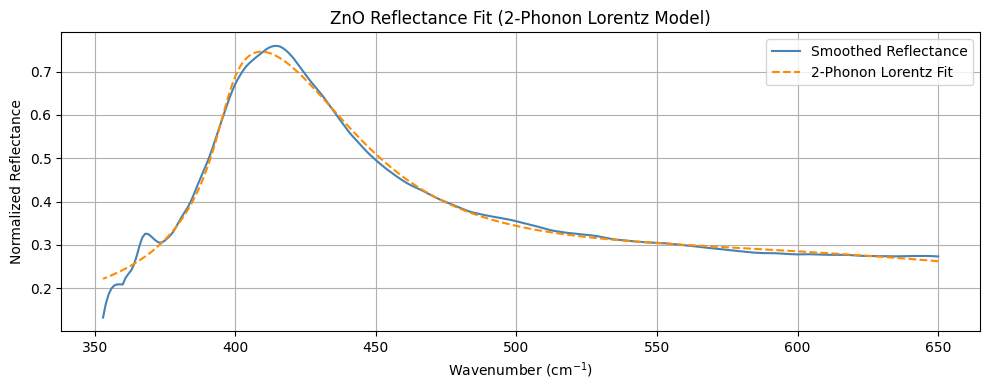

ε_inf  = 1.027
ω_LO1  = 570.3 cm⁻¹ | ω_TO1 = 397.0 cm⁻¹ | γ1 = 11.4 cm⁻¹
ω_LO2  = 735.0 cm⁻¹ | ω_TO2 = 482.9 cm⁻¹ | γ2 = 350.4 cm⁻¹


In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

# --- Your data ---
wavenumber = np.array(spectrum_dict['Zinc Oxide Reflectivity']['Wavenumber'])  # cm⁻¹
reflectance = np.array(spectrum_dict['Zinc Oxide Reflectivity']['Normalized Intensity'])
c_cm = 3e10  # speed of light (cm/s)

# --- Masking range ---
mask = (wavenumber >= 353) & (wavenumber <= 650)
w_masked = wavenumber[mask]
R_masked = reflectance[mask]
R_smooth = savgol_filter(R_masked, window_length=15, polyorder=3)
omega_masked = 2 * np.pi * c_cm * w_masked

# --- 2-Phonon Lorentz model ---
def lorentz_eps_multi(omega, eps_inf,
                      w_lo1, w_to1, gamma1,
                      w_lo2, w_to2, gamma2):
    term1 = (w_lo1**2 - w_to1**2) / (w_to1**2 - omega**2 - 1j * gamma1 * omega)
    term2 = (w_lo2**2 - w_to2**2) / (w_to2**2 - omega**2 - 1j * gamma2 * omega)
    return eps_inf + term1 + term2

def reflectivity_model_multi(omega, eps_inf,
                             w_lo1, w_to1, gamma1,
                             w_lo2, w_to2, gamma2):
    eps = lorentz_eps_multi(omega, eps_inf, w_lo1, w_to1, gamma1, w_lo2, w_to2, gamma2)
    n = np.sqrt((np.abs(eps) + eps.real) / 2)
    k = np.sqrt((np.abs(eps) - eps.real) / 2)
    return ((n - 1)**2 + k**2) / ((n + 1)**2 + k**2)

# --- Initial guess & bounds ---
p0 = [
    10,                              # ε_inf
    700 * 2 * np.pi * c_cm,          # LO1
    425 * 2 * np.pi * c_cm,          # TO1
    100 * 2 * np.pi * c_cm,          # γ1
    600 * 2 * np.pi * c_cm,          # LO2
    360 * 2 * np.pi * c_cm,          # TO2
    50 * 2 * np.pi * c_cm            # γ2
]

bounds = (
    [1, 500*2*np.pi*c_cm, 350*2*np.pi*c_cm, 10*2*np.pi*c_cm,
        500*2*np.pi*c_cm, 340*2*np.pi*c_cm, 10*2*np.pi*c_cm],
    [30, 900*2*np.pi*c_cm, 480*2*np.pi*c_cm, 500*2*np.pi*c_cm,
        900*2*np.pi*c_cm, 450*2*np.pi*c_cm, 500*2*np.pi*c_cm]
)

# Tighter, more realistic dielectric baseline
bounds[1][0] = 12  # ε_inf upper bound lowered from 30

# Extend LO/TO range to allow broader oscillator space
bounds[1][1] = 1000 * 2 * np.pi * c_cm  # ω_LO1 max
bounds[1][2] = 480 * 2 * np.pi * c_cm   # ω_TO1 max
bounds[1][4] = 1000 * 2 * np.pi * c_cm  # ω_LO2 max
bounds[1][5] = 480 * 2 * np.pi * c_cm   # ω_TO2 max


# Let γ2 grow more
bounds[1][6] = 400 * 2 * np.pi * c_cm   # γ2 max (increased from 500 to 300 cm⁻¹)

bounds[1][0] = 16  # ε_inf
bounds[1][4] = 1100 * 2 * np.pi * c_cm  # ω_LO2
bounds[1][5] = 550 * 2 * np.pi * c_cm   # ω_TO2

p0[0] = 6  # ε_inf
p0[6] = 100 * 2 * np.pi * c_cm  # γ2

# --- Fit execution ---
popt, _ = curve_fit(reflectivity_model_multi, omega_masked, R_smooth, p0=p0, bounds=bounds)

# --- Extract values ---
eps_inf = popt[0]
w_lo1, w_to1, gamma1 = popt[1:4]
w_lo2, w_to2, gamma2 = popt[4:7]

# --- Plot ---
R_fit = reflectivity_model_multi(omega_masked, *popt)

plt.figure(figsize=(10, 4))
plt.plot(w_masked, R_smooth, label='Smoothed Reflectance', color='steelblue')
plt.plot(w_masked, R_fit, '--', label='2-Phonon Lorentz Fit', color='darkorange')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Normalized Reflectance')
plt.title('ZnO Reflectance Fit (2-Phonon Lorentz Model)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Print Results ---
def cm(val): return val / (2 * np.pi * c_cm)
print(f"ε_inf  = {eps_inf:.3f}")
print(f"ω_LO1  = {cm(w_lo1):.1f} cm⁻¹ | ω_TO1 = {cm(w_to1):.1f} cm⁻¹ | γ1 = {cm(gamma1):.1f} cm⁻¹")
print(f"ω_LO2  = {cm(w_lo2):.1f} cm⁻¹ | ω_TO2 = {cm(w_to2):.1f} cm⁻¹ | γ2 = {cm(gamma2):.1f} cm⁻¹")


In [136]:
print(spectrum_dict['Zinc Oxide Reflectivity']['Normalized Intensity'][353:650])

353    0.012647
354    0.012314
355    0.012169
356    0.012133
357    0.012140
         ...   
645    0.013538
646    0.013578
647    0.013579
648    0.013564
649    0.013573
Name: Normalized Intensity, Length: 297, dtype: float64


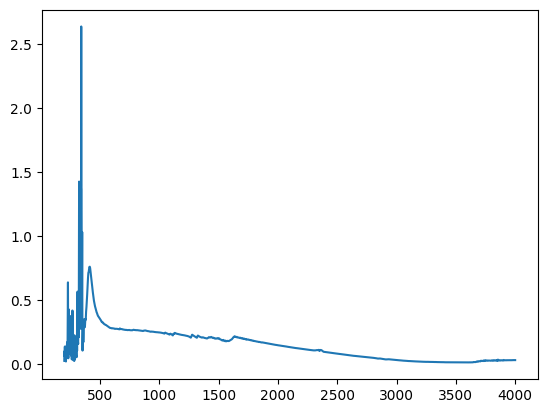

In [137]:
plt.plot(spectrum_dict['Zinc Oxide Reflectivity']['Wavenumber'], spectrum_dict['Zinc Oxide Reflectivity']['Normalized Intensity'])
plt.show()